<a href="https://colab.research.google.com/github/patricktenga-svg/colloque_Kin_2025/blob/main/colloque_Kin_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 45.7 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.1
    Uninstalling cachetools-7.0.1:
      Successfully uninstalled cachetools-7.0.1


In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 68.8 MB/s eta 0:00:00


In [ ]:
!pip install snscrape

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 6.0 MB/s eta 0:00:00


In [ ]:
#!pip install -q snscrape==0.3.4

In [ ]:
import os
import pandas as pd
from datetime import date
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1D CNN package
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import librosa
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
# import libarries for reading data, exploring and plotting
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# library for train test split
from sklearn.model_selection import train_test_split

# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Modeling
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, GRU, GlobalAveragePooling1D, Flatten, Dense, Dropout, LSTM, SpatialDropout1D, Bidirectional

In [ ]:
today = date.today()
end_date = today

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 0. Load data

### Merge all online media publication Mediacongo 7/7, grandlacs.cd, actualite.cd

In [ ]:
df_media  = pd.read_csv('/content/drive/MyDrive/Research perso/data-personal/mediacongo_df.csv')
df_media.drop(["Unnamed: 0.1", "Unnamed: 0"],axis=1,inplace = True)
df_media.head()

title  \
0  Provinces Démolition des maisons à Joli-Parc :...   
1  Provinces Est du pays : au moins six morts dan...   
2  Provinces Montée de l’insécurité à Goma et dan...   
3  Santé Quatre décès dus à l’épidémie de choléra...   
4  Société RDC-Rwanda : « En trente ans en brouss...   

                                                link  \
0  https://www.mediacongo.net/article-actualite-1...   
1  https://www.mediacongo.net/article-actualite-1...   
2  https://www.mediacongo.net/article-actualite-1...   
3  https://www.mediacongo.net/article-actualite-1...   
4  https://www.mediacongo.net/article-actualite-1...   

                                        text_article   category  \
0  Débutée ce vendredi 04 juillet 2025, la démoli...  Provinces   
1  Le territoire de Walungu, dans la province du ...  Provinces   
2  La ville de Goma et le territoire de Nyiragong...  Provinces   
3  Quatre (4) décès dus à l’épidémie de choléra, ...      Santé   
4  Quelques jours après la signature de l’accord ...    Société   

                      author        date  
0  MediaCongo Patrick Kitoko  2025-07-04  
1   MediaCongo Divine Busime  2025-07-04  
2                 MediaCongo  2025-07-04  
3                 MediaCongo  2025-07-04  
4                 MediaCongo  2025-07-04

In [ ]:
df_media

title  \
0      Provinces Démolition des maisons à Joli-Parc :...   
1      Provinces Est du pays : au moins six morts dan...   
2      Provinces Montée de l’insécurité à Goma et dan...   
3      Santé Quatre décès dus à l’épidémie de choléra...   
4      Société RDC-Rwanda : « En trente ans en brouss...   
...                                                  ...   
33395  Provinces Province Orientale : 9 militaires po...   
33396  Provinces La menace de la LRA toujours présent...   
33397  Provinces 30.000 personnes déplacées vivent da...   
33398  Politique La Monusco conditionne le lancement ...   
33399  Economie Bas-Congo: la société civile et la Fe...   

                                                    link  \
0      https://www.mediacongo.net/article-actualite-1...   
1      https://www.mediacongo.net/article-actualite-1...   
2      https://www.mediacongo.net/article-actualite-1...   
3      https://www.mediacongo.net/article-actualite-1...   
4      https://www.mediacongo.net/article-actualite-1...   
...                                                  ...   
33395  https://www.mediacongo.net/article-actualite-9...   
33396  https://www.mediacongo.net/article-actualite-9...   
33397  https://www.mediacongo.net/article-actualite-9...   
33398  https://www.mediacongo.net/article-actualite-9...   
33399  https://www.mediacongo.net/article-actualite-4...   

                                            text_article   category  \
0      Débutée ce vendredi 04 juillet 2025, la démoli...  Provinces   
1      Le territoire de Walungu, dans la province du ...  Provinces   
2      La ville de Goma et le territoire de Nyiragong...  Provinces   
3      Quatre (4) décès dus à l’épidémie de choléra, ...      Santé   
4      Quelques jours après la signature de l’accord ...    Société   
...                                                  ...        ...   
33395  Au cours de cette enquête de onze jours, Plus ...  Provinces   
33396  "La LRA reste toujours une menace en RDC. Si v...  Provinces   
33397  Lors de la conférence de presse hebdomadaire d...  Provinces   
33398  « Les FDLR ne sont pas des groupes  militaires...  Politique   
33399  Des sources du bureau de la Fec au Bas-Congo d...   Economie   

                          author        date  
0      MediaCongo Patrick Kitoko  2025-07-04  
1       MediaCongo Divine Busime  2025-07-04  
2                     MediaCongo  2025-07-04  
3                     MediaCongo  2025-07-04  
4                     MediaCongo  2025-07-04  
...                          ...         ...  
33395                 MediaCongo  2014-01-17  
33396                 MediaCongo  2014-01-17  
33397                 MediaCongo  2014-01-16  
33398                 MediaCongo  2014-01-16  
33399                 MediaCongo  2014-01-15  

[33400 rows x 6 columns]

In [ ]:
df_media.tail()

title  \
33395  Provinces Province Orientale : 9 militaires po...   
33396  Provinces La menace de la LRA toujours présent...   
33397  Provinces 30.000 personnes déplacées vivent da...   
33398  Politique La Monusco conditionne le lancement ...   
33399  Economie Bas-Congo: la société civile et la Fe...   

                                                    link  \
33395  https://www.mediacongo.net/article-actualite-9...   
33396  https://www.mediacongo.net/article-actualite-9...   
33397  https://www.mediacongo.net/article-actualite-9...   
33398  https://www.mediacongo.net/article-actualite-9...   
33399  https://www.mediacongo.net/article-actualite-4...   

                                            text_article   category  \
33395  Au cours de cette enquête de onze jours, Plus ...  Provinces   
33396  "La LRA reste toujours une menace en RDC. Si v...  Provinces   
33397  Lors de la conférence de presse hebdomadaire d...  Provinces   
33398  « Les FDLR ne sont pas des groupes  militaires...  Politique   
33399  Des sources du bureau de la Fec au Bas-Congo d...   Economie   

           author        date  
33395  MediaCongo  2014-01-17  
33396  MediaCongo  2014-01-17  
33397  MediaCongo  2014-01-16  
33398  MediaCongo  2014-01-16  
33399  MediaCongo  2014-01-15

We delete the columns 'Unnamed: 0' and 'link' which are not necessary for this study.
So as the title is also significative, we are going to merge title and body into to attribute news. We will also change the attribute category to news_Category.
The total of articles is $233,800$ element coming from 33400 rows × 7 columns, from Jan 2014 to July 2025 that we have scraped from website mediacongo.net

In [ ]:
df_media.head()

title  \
0  Provinces Démolition des maisons à Joli-Parc :...   
1  Provinces Est du pays : au moins six morts dan...   
2  Provinces Montée de l’insécurité à Goma et dan...   
3  Santé Quatre décès dus à l’épidémie de choléra...   
4  Société RDC-Rwanda : « En trente ans en brouss...   

                                                link  \
0  https://www.mediacongo.net/article-actualite-1...   
1  https://www.mediacongo.net/article-actualite-1...   
2  https://www.mediacongo.net/article-actualite-1...   
3  https://www.mediacongo.net/article-actualite-1...   
4  https://www.mediacongo.net/article-actualite-1...   

                                        text_article   category  \
0  Débutée ce vendredi 04 juillet 2025, la démoli...  Provinces   
1  Le territoire de Walungu, dans la province du ...  Provinces   
2  La ville de Goma et le territoire de Nyiragong...  Provinces   
3  Quatre (4) décès dus à l’épidémie de choléra, ...      Santé   
4  Quelques jours après la signature de l’accord ...    Société   

                      author        date  
0  MediaCongo Patrick Kitoko  2025-07-04  
1   MediaCongo Divine Busime  2025-07-04  
2                 MediaCongo  2025-07-04  
3                 MediaCongo  2025-07-04  
4                 MediaCongo  2025-07-04

In [ ]:
df_media.dtypes

title           object
link            object
text_article    object
category        object
author          object
date            object
dtype: object

In [ ]:
df_media['date'] = pd.to_datetime(df_media['date']).dt.normalize()

In [ ]:
df_media.dtypes

title                   object
link                    object
text_article            object
category                object
author                  object
date            datetime64[ns]
dtype: object

In [ ]:
df_media['category'].nunique()

18

In [ ]:
df_media['category'].unique()

array(['Provinces', 'Santé', 'Société', 'Afrique', 'Politique',
       'Religion', 'Economie', 'Science & env.', 'Culture', 'Diaspora',
       'Sport', 'Insolite', 'Femme', 'Sur le net', 'Musique', 'Monde',
       'Style et Beauté', 'MC Geek !'], dtype=object)

In [ ]:
# Lower column 'category'
df_media['category'] = df_media.category.str.lower()
df_media['title'] = df_media.title.str.lower()
df_media['news'] = df_media.text_article.str.lower()
df_media['author'] = df_media.author.str.lower()
df_media.head()

title  \
0  provinces démolition des maisons à joli-parc :...   
1  provinces est du pays : au moins six morts dan...   
2  provinces montée de l’insécurité à goma et dan...   
3  santé quatre décès dus à l’épidémie de choléra...   
4  société rdc-rwanda : « en trente ans en brouss...   

                                                link  \
0  https://www.mediacongo.net/article-actualite-1...   
1  https://www.mediacongo.net/article-actualite-1...   
2  https://www.mediacongo.net/article-actualite-1...   
3  https://www.mediacongo.net/article-actualite-1...   
4  https://www.mediacongo.net/article-actualite-1...   

                                        text_article   category  \
0  Débutée ce vendredi 04 juillet 2025, la démoli...  provinces   
1  Le territoire de Walungu, dans la province du ...  provinces   
2  La ville de Goma et le territoire de Nyiragong...  provinces   
3  Quatre (4) décès dus à l’épidémie de choléra, ...      santé   
4  Quelques jours après la signature de l’accord ...    société   

                      author       date  \
0  mediacongo patrick kitoko 2025-07-04   
1   mediacongo divine busime 2025-07-04   
2                 mediacongo 2025-07-04   
3                 mediacongo 2025-07-04   
4                 mediacongo 2025-07-04   

                                                news  
0  débutée ce vendredi 04 juillet 2025, la démoli...  
1  le territoire de walungu, dans la province du ...  
2  la ville de goma et le territoire de nyiragong...  
3  quatre (4) décès dus à l’épidémie de choléra, ...  
4  quelques jours après la signature de l’accord ...

In [ ]:
df_media = df_media.drop(['text_article'], axis = 1)
df_media.head()

title  \
0  provinces démolition des maisons à joli-parc :...   
1  provinces est du pays : au moins six morts dan...   
2  provinces montée de l’insécurité à goma et dan...   
3  santé quatre décès dus à l’épidémie de choléra...   
4  société rdc-rwanda : « en trente ans en brouss...   

                                                link   category  \
0  https://www.mediacongo.net/article-actualite-1...  provinces   
1  https://www.mediacongo.net/article-actualite-1...  provinces   
2  https://www.mediacongo.net/article-actualite-1...  provinces   
3  https://www.mediacongo.net/article-actualite-1...      santé   
4  https://www.mediacongo.net/article-actualite-1...    société   

                      author       date  \
0  mediacongo patrick kitoko 2025-07-04   
1   mediacongo divine busime 2025-07-04   
2                 mediacongo 2025-07-04   
3                 mediacongo 2025-07-04   
4                 mediacongo 2025-07-04   

                                                news  
0  débutée ce vendredi 04 juillet 2025, la démoli...  
1  le territoire de walungu, dans la province du ...  
2  la ville de goma et le territoire de nyiragong...  
3  quatre (4) décès dus à l’épidémie de choléra, ...  
4  quelques jours après la signature de l’accord ...

In [ ]:
df_Sampled = df_media.sample(frac=1)
df_M1 = df_Sampled.reset_index(drop=True)
df_M1 = df_M1.drop(['link'], axis = 1)
df_M1.tail()

title   category  \
33395  provinces nord-kivu : 8 miliciens  maï-maï neu...  provinces   
33396  provinces villes mortes : paralysie d'activité...  provinces   
33397  provinces haut-uele: le conseil des ministres ...  provinces   
33398  economie les producteurs agricoles informés du...   economie   
33399  provinces sud-kivu : un colonel fdlr/cnrd capt...  provinces   

                                                  author       date  \
33395                           mediacongo samuel isenge 2022-08-03   
33396                         mediacongo delphin mupanda 2017-11-15   
33397  mediacongo richard kaponirwe, depuis le haut-uele 2020-10-24   
33398                                         mediacongo 2014-02-01   
33399                                         mediacongo 2020-07-14   

                                                    news  
33395  les forces armées de la république démocratiqu...  
33396  les manifestations de la lucha et du collectif...  
33397  le retour massif des éleveurs nomades armés di...  
33398  les sels de cet acide, appelés  cyanures et se...  
33399  un colonel des forces démocratiques pour la li...

Nous avons 18 catégories dont:'Provinces', 'Santé', 'Société', 'Afrique', 'Politique','Religion', 'Economie', 'Science & env.', 'Culture', 'Diaspora','Sport', 'Insolite', 'Femme', 'Sur le net', 'Musique', 'Monde','Style et Beauté', 'MC Geek !'

In [ ]:
# Using groupby() and count()
# to get the count of each group
df1 = df_M1.groupby(['category'])['category'].count().sort_values(ascending=False)
print("Get count of each group:\n", df1)

Get count of each group:
 category
provinces          28091
société             1759
politique           1112
santé                730
economie             688
science & env.       257
afrique              184
religion             152
femme                142
sport                 65
insolite              63
culture               59
musique               32
sur le net            29
diaspora              25
style et beauté        5
monde                  4
mc geek !              3
Name: category, dtype: int64


In [ ]:
# Get the top N most frequent categories
top_n = 6
top_categories = df_M1['category'].value_counts().head(top_n).index.tolist()

In [ ]:
# Replace values not in the top categories with NaN
df_M1.loc[~df_M1['category'].isin(top_categories), 'category'] = np.nan

print(df_M1)

                                                   title   category  \
0      provinces tshopo : vers la paix durable à lubu...  provinces   
1      société infrastructures : paul tshilumbu plaid...    société   
2      santé maï-ndombe : début du traitement gratuit...      santé   
3      provinces ituri, 14 personnes tuées dans une a...  provinces   
4      provinces aide aux réfugiés centrafricains pou...  provinces   
...                                                  ...        ...   
33395  provinces nord-kivu : 8 miliciens  maï-maï neu...  provinces   
33396  provinces villes mortes : paralysie d'activité...  provinces   
33397  provinces haut-uele: le conseil des ministres ...  provinces   
33398  economie les producteurs agricoles informés du...   economie   
33399  provinces sud-kivu : un colonel fdlr/cnrd capt...  provinces   

                                                  author       date  \
0                                             mediacongo 2024-12-10   
1    

In [ ]:
df_M1.dtypes

title               object
category            object
author              object
date        datetime64[ns]
news                object
dtype: object

In [ ]:
df_M1 = df_M1.dropna()
df_M1

title   category  \
0      provinces tshopo : vers la paix durable à lubu...  provinces   
1      société infrastructures : paul tshilumbu plaid...    société   
2      santé maï-ndombe : début du traitement gratuit...      santé   
3      provinces ituri, 14 personnes tuées dans une a...  provinces   
4      provinces aide aux réfugiés centrafricains pou...  provinces   
...                                                  ...        ...   
33395  provinces nord-kivu : 8 miliciens  maï-maï neu...  provinces   
33396  provinces villes mortes : paralysie d'activité...  provinces   
33397  provinces haut-uele: le conseil des ministres ...  provinces   
33398  economie les producteurs agricoles informés du...   economie   
33399  provinces sud-kivu : un colonel fdlr/cnrd capt...  provinces   

                                                  author       date  \
0                                             mediacongo 2024-12-10   
1                                          mediacongo lm 2024-06-11   
2                                mediacongo armand minos 2023-04-29   
3                                             mediacongo 2023-08-30   
4                                          mediacongo s_ 2018-04-17   
...                                                  ...        ...   
33395                           mediacongo samuel isenge 2022-08-03   
33396                         mediacongo delphin mupanda 2017-11-15   
33397  mediacongo richard kaponirwe, depuis le haut-uele 2020-10-24   
33398                                         mediacongo 2014-02-01   
33399                                         mediacongo 2020-07-14   

                                                    news  
0      la ministre des affaires foncières, acacia ban...  
1      plusieurs routes construites ou réhabilitées e...  
2      les habitants de la ville d’lnongo, chef-lieu ...  
3      au moins quatorze personnes ont été tuées dans...  
4      quelque 3.500 familles de réfugiés centrafrica...  
...                                                  ...  
33395  les forces armées de la république démocratiqu...  
33396  les manifestations de la lucha et du collectif...  
33397  le retour massif des éleveurs nomades armés di...  
33398  les sels de cet acide, appelés  cyanures et se...  
33399  un colonel des forces démocratiques pour la li...  

[32583 rows x 5 columns]

In [ ]:
df_M1.dtypes

title               object
category            object
author              object
date        datetime64[ns]
news                object
dtype: object

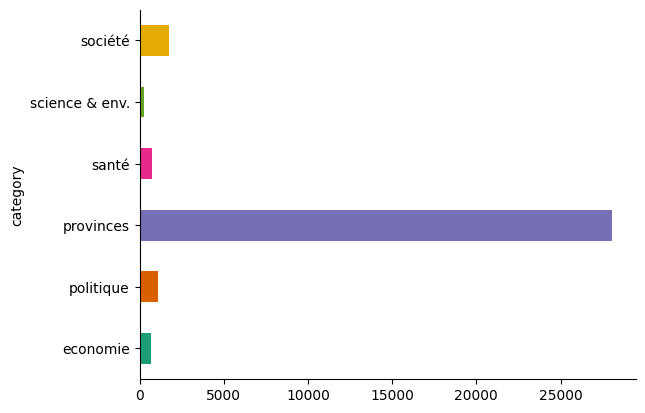

In [ ]:
# @title category

from matplotlib import pyplot as plt
import seaborn as sns
df_M1.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Grandlacs media

In [ ]:
df_grandlac = pd.read_csv('/content/drive/MyDrive/Research perso/data-personal/df_grandLac.csv')
df_grandlac.drop(["Unnamed: 0.1", "Unnamed: 0"],axis=1,inplace = True)
df_grandlac.head()

title  \
0  RDC : L'état de siège prorogé au Nord-Kivu et ...   
1  Beni: Fortes attentes envers le général Mugisa...   
2  Arrestations des Généraux des FARDC : A son to...   
3  Guerre en RDC : Le M23 accuse Kinshasa de sape...   
4  Beni : L’insécurité resurgit à Kasindi après l...   

                                                link  \
0  https://www.grandslacsnews.com/posts/rdc-l-eta...   
1  https://www.grandslacsnews.com/posts/beni-fort...   
2  https://www.grandslacsnews.com/posts/arrestati...   
3  https://www.grandslacsnews.com/posts/guerre-en...   
4  https://www.grandslacsnews.com/posts/beni-l-in...   

                                        text_article  category        author  \
0  Intervenant lors de la récente réunion du cons...  Sécurité  Joseph Seven   
1  La société civile forces vives de Beni salue l...  Sécurité  Fred mastaki   
2  Après l'ancien Chef d'Etat-Major de l'armée Co...  Sécurité  Joseph Seven   
3  Ça se précise un peu plus : le nouveau round d...  Sécurité  Joseph Seven   
4  Quelques heures seulement après le passage du ...  Sécurité  Fred mastaki   

                    date  
0  19 juillet 2025 17:19  
1  18 juillet 2025 18:17  
2  18 juillet 2025 16:33  
3  18 juillet 2025 09:02  
4  17 juillet 2025 17:05

In [ ]:
df_grandlacok= df_grandlac.drop(['link'], axis=1)
df_grandlacok['news'] = df_grandlacok.apply(lambda x: ' '.join(x.dropna().astype(str).values), axis=1)
#df_mediaok.drop(['title','body'], axis =1)

In [ ]:
# Lower column 'category'
df_grandlacok['category'] = df_grandlacok.category.str.lower()
df_grandlacok['title'] = df_grandlacok.title.str.lower()
df_grandlacok['news'] = df_grandlacok.text_article.str.lower()
df_grandlacok['author'] = df_grandlacok.author.str.lower()
df_grandlacok = df_grandlacok.drop(['text_article'], axis = 1)
df_grandlacok.head()

title  category        author  \
0  rdc : l'état de siège prorogé au nord-kivu et ...  sécurité  joseph seven   
1  beni: fortes attentes envers le général mugisa...  sécurité  fred mastaki   
2  arrestations des généraux des fardc : a son to...  sécurité  joseph seven   
3  guerre en rdc : le m23 accuse kinshasa de sape...  sécurité  joseph seven   
4  beni : l’insécurité resurgit à kasindi après l...  sécurité  fred mastaki   

                    date                                               news  
0  19 juillet 2025 17:19  intervenant lors de la récente réunion du cons...  
1  18 juillet 2025 18:17  la société civile forces vives de beni salue l...  
2  18 juillet 2025 16:33  après l'ancien chef d'etat-major de l'armée co...  
3  18 juillet 2025 09:02  ça se précise un peu plus : le nouveau round d...  
4  17 juillet 2025 17:05  quelques heures seulement après le passage du ...

In [ ]:
df_grandlacok.tail(50)

title   category  \
3676  nord-kivu: un an après l’élection de carly kas...  politique   
3677  décès à la présidence : pour le porte-parole d...  politique   
3678  sécurité, covid-19 et budget : les points à l’...  politique   
3679  dépistage massif, vaccin, reprise des activité...  politique   
3680  le sénat rejette la demande d’autorisation des...  politique   
3681  après l’arrestation de jean jacques mamba, l’a...  politique   
3682  rdc : le gouvernement prévoit un plan de la re...  politique   
3683  rdc : le parlement autorise la prorogation de ...  politique   
3684  sécurité, covid-19, budget : les points à l’or...  politique   
3685  rdc : pour le porte-parole de l’unc, félix tsh...  politique   
3686  bras de fer à l’assemblée nationale congolaise...  politique   
3687  « je suis toujours conseiller spécial du chef ...  politique   
3688  rdc-coronavirus : pour éviter la récession, le...  politique   
3689  rdc-coronavirus : le gouvernement compte prolo...  politique   
3690  avec 9 mois d'arriérés, le député jean paul lu...  politique   
3691  rdc : non conviés à la dernière plénière, des ...  politique   
3692  rdc : le corps diplomatique promet son soutien...  politique   
3693  rdc : l’état d’urgence prolongé jusqu’au 8 mai...  politique   
3694  rdc : le sénat adopte à son tour la propositio...  politique   
3695  la situation du coronavirus en rdc au cœur de ...  politique   
3696  nord-kivu : quelles solutions pour les nombreu...  politique   
3697  rdc : impératif pour la prorogation de l'état ...  politique   
3698  rdc : le président tshisekedi promet de l’aide...  politique   
3699  rdc : le congrès parlementaire plus que jamais...  politique   
3700  rdc : désinfection du palais du peuple avant l...  politique   
3701  rdc : le président de la république ordonne la...  politique   
3702  rdc : le gouvernement arrête une série de mesu...  politique   
3703  rdc : politiques et parlementaires ont rendu l...  politique   
3704  [vidéo] félix tshisekedi et joseph kabila s’en...  politique   
3705  rdc : avec 6 mois d'impaiement des salaires, l...  politique   
3706  « il est temps que le parlement se mobilise po...  politique   
3707  rdc : plus de 17 mille fonctionnaires et agent...  politique   
3708  nord-kivu : le manque de la rétrocession contr...  politique   
3709  rdc : examen et adoption de 11 dossiers lors d...  politique   
3710  3ème sommet quadripartite à luanda entre la rd...  politique   
3711  le président tshisekedi n'est pas dieu pour ré...  politique   
3712  félix tshisekedi : un an après sa prise de pou...  politique   
3713  [vidéo] jeanine mabunda réagit au sujet de la ...  politique   
3714  nord-kivu : le gouverneur de province carly ka...  politique   
3715  [vidéo] félix tshisekedi: « adf n’est plus une...  politique   
3716  [vidéo] le président félix tshisekedi s’exprim...  politique   
3717  l'honorable prince kihangi dénonce la non repr...  politique   
3718  rdc : tripartite entre la présidence et les de...  politique   
3719  la rentrée du gouvernement intervient avec un ...  politique   
3720  [vidéo] retour sur le message des vœux du prés...  politique   
3721  le président honoraire joseph kabila se prête,...  politique   
3722  après le président félix tshisekedi, martin fa...  politique   
3723  assemblée nationale : proposition de loi sur l...  politique   
3724  goma : début de la 2ème édition du forum woman...  politique   
3725  espagne d1: avec un but de théo bongonda, cadi...  politique   

                        author                   date  \
3676              samuel abiba      30 mai 2020 18:21   
3677                job kakule      30 mai 2020 12:23   
3678                job kakule      29 mai 2020 18:10   
3679                job kakule      27 mai 2020 00:08   
3680                job kakule      26 mai 2020 22:07   
3681                job kakule      23 mai 2020 13:07   
3682                job kakule      23 mai 2020 12:22   
3683                job

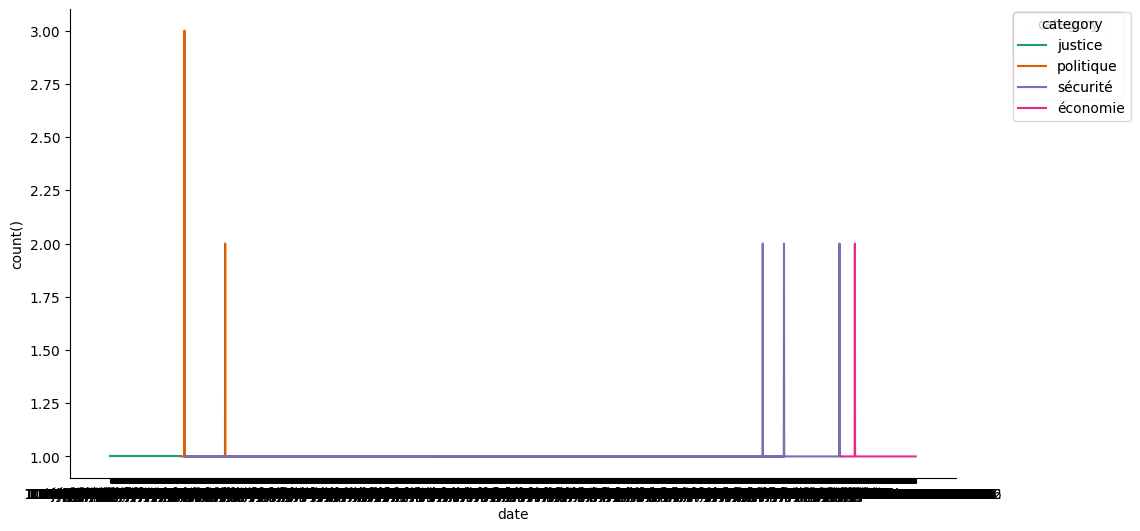

In [ ]:
# @title date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_grandlacok.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('category')):
  _plot_series(series, series_name, i)
  fig.legend(title='category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

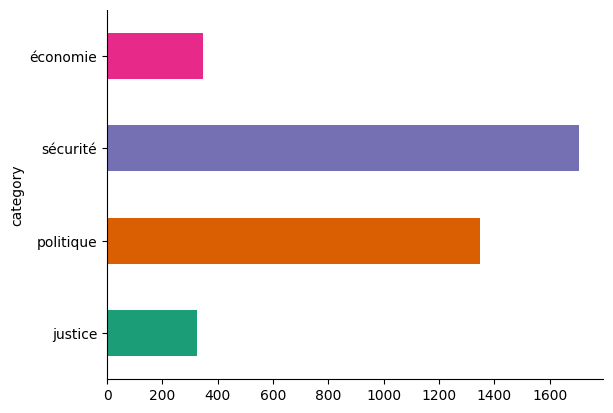

In [ ]:
# @title category

from matplotlib import pyplot as plt
import seaborn as sns
df_grandlacok.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import re

monthdict_fr_en = {
    'janvier': 'January',
    'février': 'February',
    'mars': 'March',
    'avril': 'April',
    'mai': 'May',
    'juin': 'June',
    'juillet': 'July',
    'août': 'August',
    'septembre': 'September',
    'octobre': 'October',
    'novembre': 'November',
    'décembre': 'December'
}
daydict_fr_en = {
    'lun': 'monday',
    'mar': 'tuesday',
    'mer': 'wed',
    'jeu': 'thu',
    'ven': 'fri',
    'sam': 'sat',
    'dim': 'sun',
}
def convert_french_month_to_english(date_str):
    if pd.isna(date_str):
        return date_str
    # Split the date string into parts
    date_parts = re.findall(r'\w+', date_str)
    if len(date_parts) >= 3:
        day = date_parts[0]
        month_fr = date_parts[1]
        year = date_parts[2]
        # Look up the English month name
        month_en = monthdict_fr_en.get(month_fr.lower(), month_fr) # Use .get() with a default for safety

        # Reconstruct the date string with English month name (and optionally time if present)
        if len(date_parts) > 3:
            time_part = " ".join(date_parts[3:])
            return f"{day} {month_en} {year} {time_part}"
        else:
            return f"{day} {month_en} {year}"
    return date_str # Return original string if not in expected format

In [ ]:
convert_french_month_to_english(df_grandlacok['date'][1500])

'5 January 2021 09 15'

In [ ]:
 # Apply the function to the 'date' column
df_grandlacok['date'] = df_grandlacok['date'].apply(convert_french_month_to_english)
# Convert the updated 'date' column to datetime objects, coercing errors
df_grandlacok['date'] = pd.to_datetime(df_grandlacok['date'], format="%d %B %Y %H %M").dt.strftime("%Y-%m-%d")

In [ ]:
df_grandlacok

title   category  \
0     rdc : l'état de siège prorogé au nord-kivu et ...   sécurité   
1     beni: fortes attentes envers le général mugisa...   sécurité   
2     arrestations des généraux des fardc : a son to...   sécurité   
3     guerre en rdc : le m23 accuse kinshasa de sape...   sécurité   
4     beni : l’insécurité resurgit à kasindi après l...   sécurité   
...                                                 ...        ...   
3721  le président honoraire joseph kabila se prête,...  politique   
3722  après le président félix tshisekedi, martin fa...  politique   
3723  assemblée nationale : proposition de loi sur l...  politique   
3724  goma : début de la 2ème édition du forum woman...  politique   
3725  espagne d1: avec un but de théo bongonda, cadi...  politique   

                        author        date  \
0                 joseph seven  2025-07-19   
1                 fred mastaki  2025-07-18   
2                 joseph seven  2025-07-18   
3                 joseph seven  2025-07-18   
4                 fred mastaki  2025-07-17   
...                        ...         ...   
3721                job kakule  2020-01-01   
3722                job kakule  2020-01-01   
3723              fred mastaki  2023-04-12   
3724                job kakule  2023-03-10   
3725  hussein utshu al bagdadi  2023-01-29   

                                                   news  
0     intervenant lors de la récente réunion du cons...  
1     la société civile forces vives de beni salue l...  
2     après l'ancien chef d'etat-major de l'armée co...  
3     ça se précise un peu plus : le nouveau round d...  
4     quelques heures seulement après le passage du ...  
...                                                 ...  
3721  une fois n’est pas coutume, l’ancien président...  
3722  un an après l’élection présidentielle dont il ...  
3723  réuni en plénière ce mardi dans la salle du co...  
3724  c'est la ministre nationale la culture, cather...  
3725  grâce notamment à une deuxième réalisation en ...  

[3726 rows x 5 columns]

In [ ]:
df_grandlacok['date'] = pd.to_datetime(df_grandlacok['date']).dt.normalize()

In [ ]:
df_Sampled = df_grandlacok.sample(frac=1)
df_M2 = df_Sampled.reset_index(drop=True)
#df_M2 = df_M1.drop(['link'], axis = 1)
df_M2.tail()

title   category  \
3721  crise en rdc : vers un dialogue direct entre k...   sécurité   
3722  nouvelles nominations au sein des fardc: le gé...   sécurité   
3723    rutshuru : un corps sans vie découvert à rubare   sécurité   
3724  rdc : l’odep alerte au sujet des fonds décaiss...  politique   
3725  rdc : des membres du cabinet d'eve bazaiba arr...    justice   

            author       date  \
3721  joseph seven 2025-03-11   
3722    job kakule 2022-10-18   
3723  fred mastaki 2020-12-29   
3724    job kakule 2022-02-18   
3725    job kakule 2021-12-10   

                                                   news  
3721  a la suite d’une visite de travail du présiden...  
3722  dans une série d’ordonnances présidentielles l...  
3723  découverte macabre d'un corps sans vie tôt le ...  
3724  dans un communiqué publié ce vendredi 18 févri...  
3725  plusieurs membres du cabinet de de la ministre...

In [ ]:
# Using groupby() and count()
# to get the count of each group
df2 = df_M2.groupby(['category'])['category'].count().sort_values(ascending=False)
print("Get count of each group:\n", df2)

Get count of each group:
 category
sécurité     1707
politique    1349
économie      345
justice       325
Name: category, dtype: int64


##7 sur 7

In [ ]:
df_7sur7 = pd.read_csv('/content/drive/MyDrive/Research perso/data-personal/7sur7_df.csv')
df_7sur7.drop(["Unnamed: 0.1", "Unnamed: 0"],axis=1,inplace = True)
df_7sur7.head()

title  \
0  Doha : Kinshasa et l'AFC/M23 s'accordent sur u...   
1  Processus de paix de Doha : un pré-accord entr...   
2  Lutte contre la traite humaine : Nathalie-Aziz...   
3  RDC : Guy Loando présente des outils de planif...   
4  Kyabula “malade et introuvable”: son parti pol...   

                                                link  \
0  https://7sur7.cd//index.php/2025/07/19/doha-ki...   
1  https://7sur7.cd//index.php/2025/07/19/process...   
2  https://7sur7.cd//index.php/2025/07/19/lutte-c...   
3  https://7sur7.cd//index.php/2025/07/18/rdc-guy...   
4  https://7sur7.cd//index.php/2025/07/18/kyabula...   

                                        text_article   category  \
0  Cette avancée intervient après trois mois de n...  Politique   
1  Bien que les 2 parties n'en soient pas encore ...  Politique   
2  Cette déclaration a été faite lors d'échanges ...  Politique   
3  Le ministre d’État, ministre de l’Aménagement ...  Politique   
4  Alors que la situation politique reste tendue ...  Politique   

                         author                    date  
0                            MD  sam 19/07/2025 - 11:04  
1     Isaac Kisatiro, à Butembo  sam 19/07/2025 - 09:55  
2                   Murphy Fika  sam 19/07/2025 - 09:28  
3                 Raphaël Kwazi  ven 18/07/2025 - 21:32  
4  Patient Lukusa, à Lubumbashi  ven 18/07/2025 - 20:57

In [ ]:
df_7sur7ok= df_7sur7.drop(['link'], axis=1)
df_7sur7ok['news'] = df_7sur7ok.apply(lambda x: ' '.join(x.dropna().astype(str).values), axis=1)
#df_mediaok.drop(['title','body'], axis =1)

In [ ]:
# Lower column 'category'
df_7sur7ok['category'] = df_7sur7ok.category.str.lower()
df_7sur7ok['title'] = df_7sur7ok.title.str.lower()
df_7sur7ok['news'] = df_7sur7ok.text_article.str.lower()
df_7sur7ok['author'] = df_7sur7ok.author.str.lower()
df_7sur7ok = df_7sur7ok.drop(['text_article'], axis = 1)
df_7sur7ok.head()

title   category  \
0  doha : kinshasa et l'afc/m23 s'accordent sur u...  politique   
1  processus de paix de doha : un pré-accord entr...  politique   
2  lutte contre la traite humaine : nathalie-aziz...  politique   
3  rdc : guy loando présente des outils de planif...  politique   
4  kyabula “malade et introuvable”: son parti pol...  politique   

                         author                    date  \
0                            md  sam 19/07/2025 - 11:04   
1     isaac kisatiro, à butembo  sam 19/07/2025 - 09:55   
2                   murphy fika  sam 19/07/2025 - 09:28   
3                 raphaël kwazi  ven 18/07/2025 - 21:32   
4  patient lukusa, à lubumbashi  ven 18/07/2025 - 20:57   

                                                news  
0  cette avancée intervient après trois mois de n...  
1  bien que les 2 parties n'en soient pas encore ...  
2  cette déclaration a été faite lors d'échanges ...  
3  le ministre d’état, ministre de l’aménagement ...  
4  alors que la situation politique reste tendue ...

In [ ]:
def convert_french_day_to_normal(date_str):
    if pd.isna(date_str):
        return date_str
    # Split the date string into parts
    date_parts = re.findall(r'\w+', date_str)
    if len(date_parts) >= 4:
        day = date_parts[1]
        month = date_parts[2]
        year = date_parts[3]
        # Look up the English month name
        #month_en = monthdict_fr_en.get(month_fr.lower(), month_fr) # Use .get() with a default for safety

        # Reconstruct the date string with English month name (and optionally time if present)
        if len(date_parts) > 4:
            time_part = " ".join(date_parts[4:])
            return f"{day} {month} {year} {time_part}"
        else:
            return f"{day} {month} {year}"
    return date_str # Return original string if not in expected format

In [ ]:
 # Apply the function to the 'date' column
df_7sur7ok['date'] = df_7sur7ok['date'].apply(convert_french_day_to_normal)
# Convert the updated 'date' column to datetime objects, coercing errors
df_7sur7ok['date'] = pd.to_datetime(df_7sur7ok['date'], format="%d %m %Y %H %M").dt.strftime("%Y-%m-%d")

In [ ]:
df_7sur7ok

title   category  \
0      doha : kinshasa et l'afc/m23 s'accordent sur u...  politique   
1      processus de paix de doha : un pré-accord entr...  politique   
2      lutte contre la traite humaine : nathalie-aziz...  politique   
3      rdc : guy loando présente des outils de planif...  politique   
4      kyabula “malade et introuvable”: son parti pol...  politique   
...                                                  ...        ...   
24566                     la gécamines dans la tourmente   economie   
24567         echos d’économie du lundi 8 septembre 2014   economie   
24568  réunion de crise chez matata : startimes, sign...   economie   
24569  en attendant l’avis de la cour supreme de just...  politique   
24570  les experts de la dgi et les magistrats échang...  politique   

                             author        date  \
0                                md  2025-07-19   
1         isaac kisatiro, à butembo  2025-07-19   
2                       murphy fika  2025-07-19   
3                     raphaël kwazi  2025-07-18   
4      patient lukusa, à lubumbashi  2025-07-18   
...                             ...         ...   
24566                   africarabia  2014-09-09   
24567                           NaN  2014-09-09   
24568                           NaN  2014-09-09   
24569                           NaN  2014-09-09   
24570                           NaN  2014-09-09   

                                                    news  
0      cette avancée intervient après trois mois de n...  
1      bien que les 2 parties n'en soient pas encore ...  
2      cette déclaration a été faite lors d'échanges ...  
3      le ministre d’état, ministre de l’aménagement ...  
4      alors que la situation politique reste tendue ...  
...                                                  ...  
24566                                                NaN  
24567                                                NaN  
24568                                                NaN  
24569                                                NaN  
24570                                                NaN  

[24571 rows x 5 columns]

In [ ]:
df_7sur7ok['date'] = pd.to_datetime(df_7sur7ok['date']).dt.normalize()

In [ ]:
df_7sur7ok.dtypes

title               object
category            object
author              object
date        datetime64[ns]
news                object
dtype: object

In [ ]:
# Get the top N most frequent categories
top_n = 3
top_categories = df_7sur7ok['category'].value_counts().head(top_n).index.tolist()

In [ ]:
# Replace values not in the top categories with NaN
df_7sur7ok.loc[~df_7sur7ok['category'].isin(top_categories), 'category'] = np.nan

print(df_7sur7ok)

                                                   title   category  \
0      doha : kinshasa et l'afc/m23 s'accordent sur u...  politique   
1      processus de paix de doha : un pré-accord entr...  politique   
2      lutte contre la traite humaine : nathalie-aziz...  politique   
3      rdc : guy loando présente des outils de planif...  politique   
4      kyabula “malade et introuvable”: son parti pol...  politique   
...                                                  ...        ...   
24566                     la gécamines dans la tourmente   economie   
24567         echos d’économie du lundi 8 septembre 2014   economie   
24568  réunion de crise chez matata : startimes, sign...   economie   
24569  en attendant l’avis de la cour supreme de just...  politique   
24570  les experts de la dgi et les magistrats échang...  politique   

                             author       date  \
0                                md 2025-07-19   
1         isaac kisatiro, à butembo 2025-07-19 

In [ ]:
# This cell now comes after the recreation and cleaning of df_7sur7ok
df_7sur7ok = df_7sur7ok.dropna()

In [ ]:
df_7sur7ok.tail()

title  category  \
24488  vers la création d’un fonds pour l’économie ve...  economie   
24495  rd congo : le projet de cuivre kipoi tombe dan...  economie   
24505  le sigef pour éradiquer la fraude de la produc...  economie   
24509  des experts proposent un marché transnational ...  economie   
24521  affaire de 61 containers du bois wenge : le pa...  economie   

                                                  author       date  \
24488                                     acp/fng./ndom. 2014-10-28   
24495                                      agence ecofin 2014-10-23   
24505  le deuxième plus vaste massif forestier du mon... 2014-10-20   
24509  le bengladesh est un des pays les moins émette... 2014-10-17   
24521  trois provinces de la rd congo (bandundu, kins... 2014-10-14   

                                                    news  
24488  selon lui, le thème de ces travaux de trois jo...  
24495  (agence ecofin) - la société d’exploitation de...  
24505  le deuxième plus vaste massif forestier du mon...  
24509  le bengladesh est un des pays les moins émette...  
24521  trois provinces de la rd congo (bandundu, kins...

In [ ]:
df_Sampled = df_7sur7ok.sample(frac=1)
df_M3 = df_Sampled.reset_index(drop=True)
#df_M2 = df_M1.drop(['link'], axis = 1)
df_M3.tail()

title   category  \
12339  pius muabilu après consultation : "comme répub...  politique   
12340  rdc : l'unafec de kyungu "se réjouit de la nom...  politique   
12341  cirgl : kinshasa va abriter le 9e sommet des c...  politique   
12342  nicolas kazadi : « notre avenir n'est pas dans...  politique   
12343  kinshasa : les jeunes de l'udps dénoncent une ...  politique   

                                                  author       date  \
12339                                     jephté kitsita 2020-11-11   
12340                                 jeff kaleb hobiang 2019-05-24   
12341                                      prince mayiro 2025-06-16   
12342                                     jephté kitsita 2023-08-28   
12343  les jeunes du parti présidentiel, union pour l... 2022-07-08   

                                                    news  
12339  pius muabilu a été reçu ce mercredi 11 novembr...  
12340  dans une déclaration faite vendredi 24 mai 201...  
12341  c'est dans ce cadre que le secrétaire exécutif...  
12342  ce membre du gouvernement sama lukonde l'a dit...  
12343  les jeunes du parti présidentiel, union pour l...

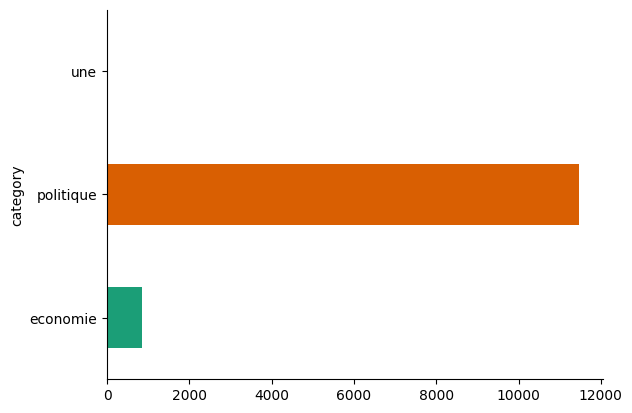

In [ ]:
# @title category

from matplotlib import pyplot as plt
import seaborn as sns
df_M3.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
pip install seaborn

In [ ]:
#df_M.groupby(['date', 'category'])['category'].count().unstack().plot.bar()
#plt.legend(fontsize='6', title_fontsize='8')

In [ ]:
# Using groupby() and count()
# to get the count of each group
df3 = df_M3.groupby(['category'])['category'].count().sort_values(ascending=False)
print("Get count of each group:\n", df3)

Get count of each group:
 category
politique    11479
economie       845
une             20
Name: category, dtype: int64




> Ajouter une citation
### plot of bar chart
> Ajouter une citation





<Axes: xlabel='category'>

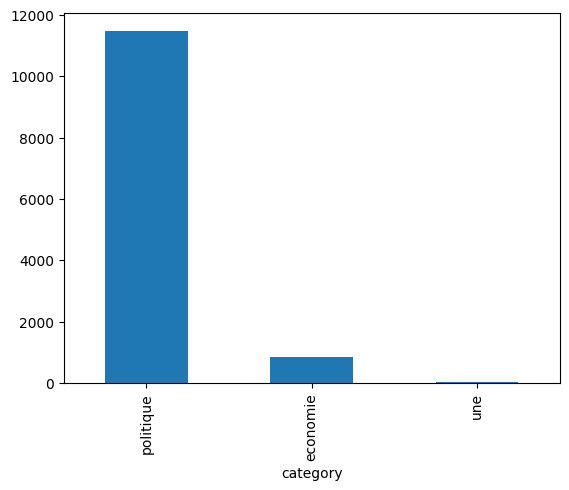

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# who v/s fare barplot
#sns.barplot(x = 'categories', y = 'count per categories', data = df2)

df3 = df_M3.groupby(['category'])['category'].count().sort_values(ascending=False).plot.bar()
df3



```
# Ce texte est au format code
```

We may observe that news in provinces are the most diffused followed by news related to société, politique, santé and others.

Dataset coming from 3 sources of popular media in DRC: Actualite.cd, 7sur7 et radiookapi, online and most influent media based in Kinshasa. Each of them owns respectively 595, 195 and 526 news during the period from 1st december 2024 till the 31december 2024. The total of news after merging all of them is 1316.

for every news, we have the following label:
1) title: topic
2) link: weblink for accessing to the news
3) categories: what kind of news is about
4) body: the text related to the news itself
5) timestamp
6) source: media which has diffused the news


Plotting number of articles over year we have discoverd that the publication per year starts to increase from 2018 with about 2000 articles and more.

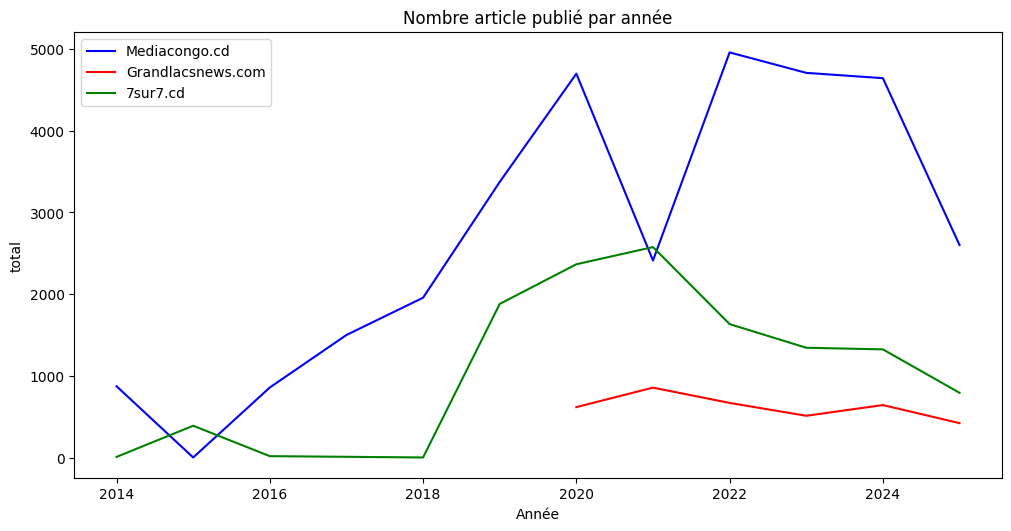

In [ ]:
import matplotlib.pyplot as plt # Import matplotlib for plotting

ycounts1 = df_M1.groupby(df_M1['date'].dt.year)['category'].size() # Corrected grouping for df_M1
ycounts2 = df_M2.groupby(df_M2['date'].dt.year)['category'].size() # Corrected grouping for df_M2
ycounts3 = df_M3.groupby(df_M3['date'].dt.year)['category'].size() # Corrected grouping for df_M3

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
ycounts1.plot(kind='line', color='blue', ax=ax, label="Mediacongo.cd") # Added label
ycounts2.plot(kind='line', color='red', ax=ax, label="Grandlacsnews.com") # Added label
ycounts3.plot(kind='line', color='green', ax=ax, label="7sur7.cd") # Added label

plt.xlabel('Année')
plt.ylabel('total')
plt.title('Nombre article publié par année')
plt.legend(fontsize='10', title_fontsize='12')
plt.show()

# L'utilisation d'outils de l'apprentissage automatique pour une meilleure compréhension du génocide ethnique et des gains économiques en RDC

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import re
import html
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!python --version

Python 3.12.12


In [ ]:
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


import warnings
warnings.filterwarnings("ignore")

Scheme
1. Data cleaning
2. Exploratory analysis
3. Model preparation
4. Model implementation and tuning
5. Results

# 1. Data cleaning



```
The title contain ‘noise’ (', :, ,, \xa0, ( ), -, «, », ., *, ?, !, %) . Prepares the news data for analysis by satisfying:

✓ All html tags and attributes (i.e., /<[^>]+>/) are removed.
✓ Html character codes (i.e., &...;) are replaced with an ASCII equivalent.
 (https://wiki.python.org/moin/EscapingHtml)
✓ All URLs are removed (ref to link).
✓ All stop words are removed. Be clear in what you consider as a stop word.
✓ All characters in the text are in lowercase.
✓ If a news is empty after pre-processing, it should be preserved as such.

Design two different text cleaning procedures for two dataset.
Let precise that regular expressions are not used here!

In case we tried to proceed news with RE,

Regular Expression Operations (https://docs.python.org/3/library/re.html#re.compile)

. matches any character except a newline
^ matches the start of the string
$ matches the end of the string
* match 0 or more repetitions (ab* will match ‘a’, ‘ab’, or ‘a’ followed by any number of ‘b’s)
+ match 1 or more repetitions (ab+ will match ‘a’ followed by any non-zero number of ‘b’s)
? match 0 or 1 repetitions (ab? will match either ‘a’ or ‘ab’)
\ escapes special characters  
[] indicate a set of characters. ([amk] match 'a', 'm', or 'k') ([a-z] match any lowercase ASCII letter)
A|B (match either A or B)
(...) matches expression inside the parentheses
\s matches any whitespace character.    
\S matches any non-whitespace character
```



In [ ]:
pip install stop_words

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.6 MB/s eta 0:00:00


In [ ]:
from stop_words import get_stop_words
stop_word = get_stop_words('french')
#stop_word = set(nltk.corpus.stopwords.words('french'))
def clean_article (text):

    new_text = re.sub(r'<...>',' ', text)  # remove html tags <...>
    new_text = html.unescape(new_text) # replace html character with ASCII
    new_text = re.sub(r'http\S+', ' ', new_text) # removed all URLs

    new_text = re.sub(r'(\\x(.){2})', ' ',new_text) # remove UTF-8 code like \\xe2
    new_text = new_text.replace(u'\xa0', u' ') # remove UTF-8 code like \xa0

    new_text = new_text.replace('%',' ') # remove %
    new_text = re.sub('[()!?]', ' ', new_text) # removing punctuations including commas,
                                       # exclamation marks question marks etc*$$
    #new_text = re.sub("[^a-z0-9]"," ", new_text) # removes all non-alphabetic
                                         #letters and keeps alphabetic and numbers
    new_text = new_text.replace("provinces ",' ') # remove word'
    new_text = new_text.replace("mediacongo.cd ",' ') # remove word'
    #new_text = new_text.replace('\\n',' ') # remove \\n

    # stem words & remove stop words
    tokenizer = RegexpTokenizer(r'\w+')
    new_text = remove_stopwords(new_text)
    words = tokenizer.tokenize(new_text)
    words_list = [word for word in words if not word in stop_word]
    words_list = [PorterStemmer().stem(word) for word in words_list]
    new_text = ' '.join(words_list)

    new_text = re.sub(r' \d+', ' ', new_text) # remove numbers after space
    new_text = " ".join(new_text.split()) # remove leading & trailing space, elimiated spaces to single space

    return new_text

In [ ]:
def count_words(df):
    # counts words frequency in text
    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = Counter()

    for i in range (df.shape[0]):
        new_text = df.iloc[i]['new_text']
        words = tokenizer.tokenize(new_text)
        word_counter.update(words)

    return word_counter

In [ ]:
# Lower column 'categories
# Replace column ',actualité' or 'actualité' everywhere
#for col in df_M.columns:
 #  df_M['categories'] = df_M['categories'].str.replace(',actualité', '')
  # df_M['categories'] = df_M['categories'].str.replace('actualité', '')

# Define a function to assign labels based on keywords
def assign_label(news_text):
    if pd.isna(news_text):
        return 'neutral' # or np.nan, depending on how you want to handle missing news
    news_text_lower = str(news_text).lower() # Ensure it's a string and in lowercase for consistent checking
    if 'genocide' in news_text_lower or 'illegal' in news_text_lower or 'attaqu' in news_text_lower:
        return 'genocide'
    elif 'disput' in news_text_lower or 'bagarr' in news_text_lower:
        return 'nongenocide'
    else:
        return 'neutral'

# Create new column for label 'threat' or 'nothreat' representing the classification of the news
df_M1['label'] = df_M1['news'].apply(assign_label)

# Lower column 'text' (already done implicitly in assign_label, but good to keep for consistency if needed elsewhere)
# df_M1['news'] = df_M1.news.str.lower() # This line is redundant after applying assign_label if news is already lowercased

# Add new column 'new_text' by cleaning column 'text'
# Ensure clean_article function is defined and has been executed
df_M1['new_text'] = df_M1['news'].apply(clean_article)

#df_final = df_final.drop('categories', axis=1)
df_M1.tail(10)

title   category  \
33390  provinces bunia: inhumation sous une vive émot...  provinces   
33391  provinces maniema : la liste du fcc seule rete...  provinces   
33392  provinces kinshasa : l'éclairage public en cou...  provinces   
33393  provinces beni : des parcelles détenues « illé...  provinces   
33394  provinces 180 000 € de l’ue en soutien aux vic...  provinces   
33395  provinces nord-kivu : 8 miliciens  maï-maï neu...  provinces   
33396  provinces villes mortes : paralysie d'activité...  provinces   
33397  provinces haut-uele: le conseil des ministres ...  provinces   
33398  economie les producteurs agricoles informés du...   economie   
33399  provinces sud-kivu : un colonel fdlr/cnrd capt...  provinces   

                                                  author       date  \
33390                                         mediacongo 2019-07-20   
33391                          mediacongo chadrack londe 2019-02-19   
33392                        mediacongo saint hervé m’b. 2020-08-26   
33393          mediacongo delphin mupanda/mcp, nord-kivu 2024-03-24   
33394                                      mediacongo lm 2021-05-27   
33395                           mediacongo samuel isenge 2022-08-03   
33396                         mediacongo delphin mupanda 2017-11-15   
33397  mediacongo richard kaponirwe, depuis le haut-uele 2020-10-24   
33398                                         mediacongo 2014-02-01   
33399                                         mediacongo 2020-07-14   

                                                    news    label  \
33390  la communauté alur vivant à bunia a mis en ter...  neutral   
33391  la commission électorale nationale indépendant...  neutral   
33392  le gouverneur de la ville de kinshasa, gentiny...  neutral   
33393  après que l'institut congolais pour la conserv...  neutral   
33394  le drame de goma touche plusieurs personnalité...  neutral   
33395  les forces armées de la république démocratiqu...  neutral   
33396  les manifestations de la lucha et du collectif...  neutral   
33397  le retour massif des éleveurs nomades armés di...  neutral   
33398  les sels de cet acide, appelés  cyanures et se...  neutral   
33399  un colonel des forces démocratiques pour la li...  neutral   

                                                new_text  
33390  communauté alur vivant bunia mi terr samedi ju...  
33391  commiss électoral national indépendant rendu p...  
33392  gouverneur vill kinshasa gentini ngobila mbaka...  
33393  institut congolai conserv natur iccn cédé part...  
33394  drame goma touch personnalité mond ainsi struc...  
33395  forc armé républiqu démocratiqu congo fardc an...  
33396  manifest lucha collectif action société civil ...  
33397  retour massif éleveur nomad armé dit mbororo i...  
33398  sel acid appelé cyanur dérivé toxiqu déclaré a...  
33399  colonel forc démocratiqu libérat rwanda fdlr c...

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.corpus import wordnet
import nltk

In [ ]:
def find_synonyms(word):
        synonyms = set()  # Use a set to avoid duplicate synonyms
        for syn_set in wordnet.synsets(word):
            for lemma in syn_set.lemmas():
                synonyms.add(lemma.name())
        return list(synonyms)

In [ ]:
word_to_find = "fight"
syns = find_synonyms(word_to_find)
print(f"Synonyms of '{word_to_find}': {syns}")

Synonyms of 'fight': ['combat', 'oppose', 'fight', 'engagement', 'struggle', 'fight_back', 'defend', 'fight_down', 'competitiveness', 'agitate', 'fighting', 'push', 'campaign', 'scrap', 'contend', 'battle', 'conflict', 'crusade', 'press']


In [ ]:
# Using groupby() and count()
# to get the count of each group
df4 = df_M1.groupby(['label'])['category'].count().sort_values(ascending=False)
print("Get count of each group:\n", df4)

Get count of each group:
 label
neutral        30979
genocide        1528
nongenocide       76
Name: category, dtype: int64


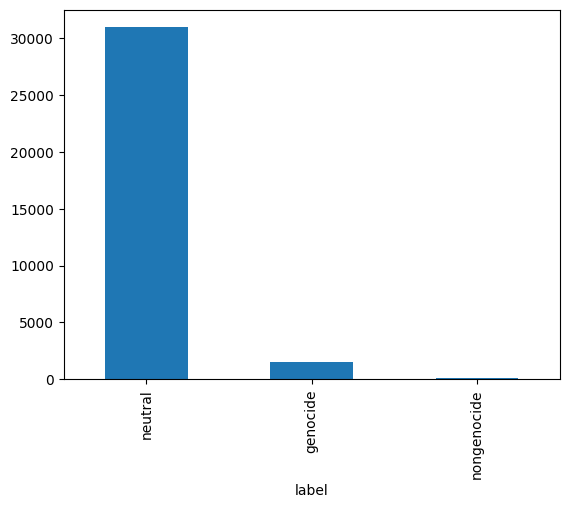

In [ ]:
df5 = df_M1.groupby(['label'])['category'].count().sort_values(ascending=False).plot.bar()

In [ ]:
df_M1['category'].unique()

array(['provinces', 'société', 'santé', 'politique', 'economie',
       'science & env.'], dtype=object)

In [ ]:
# visualize 150 words with highest frequency in 'new_text'
congo_cnt = count_words(df_M1)
congo_cnt = [(word,freq) for (word, freq) in congo_cnt.most_common(150)]
print (congo_cnt)

# 2. Exploratory analysis
## Part 1
Determines the major issues in all the news into the dataset. Look at relevant words kivu', 'provinc','nord', 'territoir','vill','société', 'gouverneur', 'armé', 'ituri', 'congo', 'sud', 'kinshasa','beni','central', 'chef','rdc', 'rebel', 'républiqu','correspond', 'kasaï', 'démocratiqu', 'contr','civil','m23', 'violenc', 'conflit', 'katanga' that identify to certain threatened situation of genocide.  

```
# `Ce texte est au format code`
```



✓ tribalism: 'violence', 'haine', 'membr','civil','conflit', 'choix'
✓ guerre: 'arm', 'kivu', 'nord','paix', 'opérat', 'local'
✓ opinion: 'justice', 'loi', 'droit','cour', 'voix', 'liberté', 'autorité', 'processu'
✓ social: 'travail', 'demand' , 'ministr','situation', 'congolais', 'société', 'campagn', 'public', 'gouvern'
✓ tribalisme & guerre (contain keys words of Liberal and Conservatives)
✓ tribalisme & opinion
✓ opinion & social
✓ All (contain keys words of all three parties)
✓ Other (other parties)

In [ ]:
raw_genocide = df_M1

In [ ]:
key_region = ['kivu', 'nord', 'gemena', 'lubumbashi', 'katanga', 'local', 'provinc','nord', 'territoir','vill','masisi', 'rutshuru', 'butembo', 'bunagana', 'gouverneur', 'ituri', 'congo', 'sud', 'kinshasa','beni','central', 'rdc', 'républiqu', 'kasaï','bukavu', 'goma', 'tshopo']
key_actors = ['rebel', 'parti', 'candidat','villag', 'ministr', 'député', 'membr', 'milicien', 'creuseur','public','gouvern','femm', 'chef', 'm23', 'adf', 'fardc', 'rdf']
key_reaction = ['violenc', 'économiqu','commerc', 'discours', 'tribalism', 'hain','civil','conflit', 'armé', 'illicit', 'campagn', 'attaqu', 'or', 'operat', 'situation', 'entrepris', 'coltan', '3T', 'société', 'processu', 'matériel' ]
# Add column 'party': determine the political party of given text
raw_genocide['genocid_issue'] = np.nan

for i in raw_genocide.index: # Iterate through the DataFrame's index
    new_text = raw_genocide.new_text[i]

    if any(word in new_text for word in key_region) and any(word in new_text for word in key_actors) and any(word in new_text for word in key_reaction):
      raw_genocide['genocid_issue'][i] = 'all'

    elif any(word in new_text for word in key_region ) and any(word in new_text for word in key_actors):
        raw_genocide['genocid_issue'][i] = 'region & actors'

    elif any(word in new_text for word in key_region) and any(word in new_text for word in key_reaction):
        raw_genocide['genocid_issue'][i] = 'region & reaction'

    elif any(word in new_text for word in key_actors) and any(word in new_text for word in key_reaction ):
        raw_genocide['genocid_issue'][i] = 'actors & reaction'

    elif any(word in new_text for word in key_region):
        raw_genocide['genocid_issue'][i] = 'region'
    elif any(word in new_text for word in key_actors):
        raw_genocide['genocid_issue'][i] = 'actors'
    elif any(word in new_text for word in key_reaction):
        raw_genocide['genocid_issue'][i] = 'reaction'
    else:
        raw_genocide['genocid_issue'][i] = 'other'
raw_genocide.head()

## Part 2
Visualizes some aspect of the generic tweets in sentiment_analysis.csv and 2019 Canadian Elections tweets.  
✓ Pie chart
✓ Count plot
✓ Word cloud
Pie chart visualizes the news tendance. Only looking the news relate to single electoral issue the news tendancy from high to low:
tribalism, guerre, opinion or social

In [ ]:
# seperate raw_elections into 8 subtables by their parties
df_all = raw_genocide[raw_genocide['genocid_issue'] == 'all']
df_region_actors = raw_genocide[raw_genocide['genocid_issue'] == 'region & actors']
df_region_reaction = raw_genocide[raw_genocide['genocid_issue'] == 'region & reaction']
df_actors_reaction= raw_genocide[raw_genocide['genocid_issue'] == 'actors and reaction']
df_region = raw_genocide[raw_genocide['genocid_issue'] == 'region']
df_actors = raw_genocide[raw_genocide['genocid_issue'] == 'actors']
df_reaction = raw_genocide[raw_genocide['genocid_issue'] == 'reaction']
df_other = raw_genocide[raw_genocide['genocid_issue'] == 'other']

x = np.char.array(['all', 'region & actors', 'region & reaction','actors and reaction',
          'region', 'actors', 'reaction', 'other'])
sizes = np.array([len(df_all),len(df_region_actors),len(df_region_reaction),len(df_actors_reaction),
         len(df_region),len(df_actors),len(df_reaction),len(df_other)])
porcent = 100.*sizes/sizes.sum()
colors = ['red','gold','lightskyblue','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
patches, texts = plt.pie(sizes, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, sizes),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')

### Count plot
✓ For news related to tribalism and social, there are more positive public opinion on online medias.
✓ Tribalism itself have the most positive news diffused, it has high popularity. The tendacy is to associate it to all others situations. There are lot of news combined all the topics into the same article.
✓ For opinions related to opinion, there are more negative public opinion on media, which relate to social situations. The chance
for topic related to populations opinion is low to be publish as people are more interested to the social situation and the tribalism.

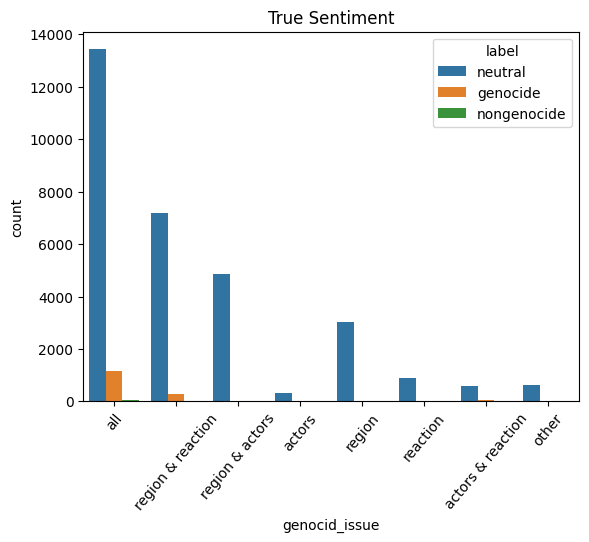

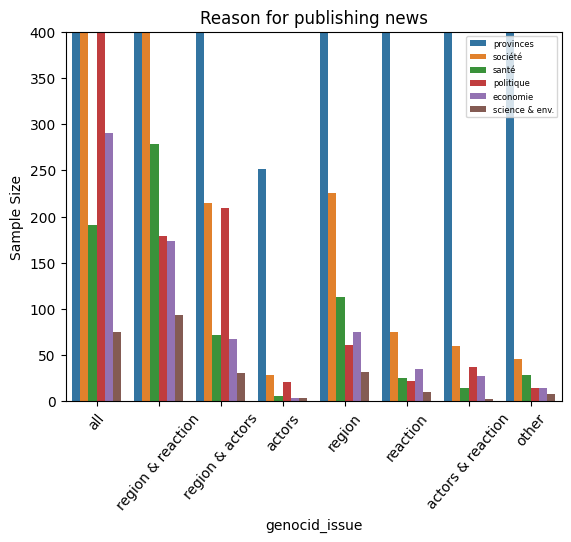

In [79]:
import matplotlib.pyplot as plt
sns.countplot(x='genocid_issue', hue='label', data=raw_genocide)

plt.xticks(rotation=50)
plt.title ('True Sentiment')
plt.show()

negative_situation = raw_genocide[raw_genocide['category'].notnull()]
#sns.countplot(x='political_issue', hue='categories', data=negative_elections)
#plt.xticks(rotation=50)
#plt.title ('Reason for threat news')
#plt.show()

labels = ['all', 'region & actors', 'region & reaction','actors and reaction',
          'region', 'actors', 'social', 'other']
#plt.figure(figsize=(10,8))
# Use newly created dataframe column as hue
ax = sns.countplot( x='genocid_issue', hue='category', data=negative_situation)
ax.set_ylabel("Sample Size")
plt.xticks(rotation=50)
plt.title ('Reason for publishing news')
plt.legend(fontsize='6', title_fontsize='8')
#h, l = ax.get_legend_handles_labels()
#ax.legend(h, labels, title="Interested in news")
plt.ylim(bottom=0)
plt.ylim(top=400)
plt.show()

## Word cloud  

Generic tweets   
✓ Visualize the word frequency, larger word appears more often.
✓ Neutral words like 'decembre', 'élection' appears in both 'sentiment 0' and 'sentiment 1' plots, contain much
information to distingush the sentiment.
✓ Words like 'sociét', 'femm' and 'actualité' in the negative sentiment plot, looks larger than in the positive sentiment plot while,'candidat' and 'vote'
these words have higher potential to be negatives.

In [80]:
def plt_wordcloud (df,label):
    # visualize the word frequency, the larger the word, more frequent the word appears in text.
    words_list = ''
    for text in df[df['label']==label]['new_text']:
        words = text.split()
        words_list += " ".join(words)

    plt.figure(figsize = (10, 5))
    cloud=WordCloud(width = 1200, height = 600, collocations=False, background_color='white',).generate(words_list)

    plt.imshow(cloud,interpolation='bilinear')
    plt.title ('Sentiment '+ str(label),size=20,color='r')
    plt.axis('off')
    plt.show()

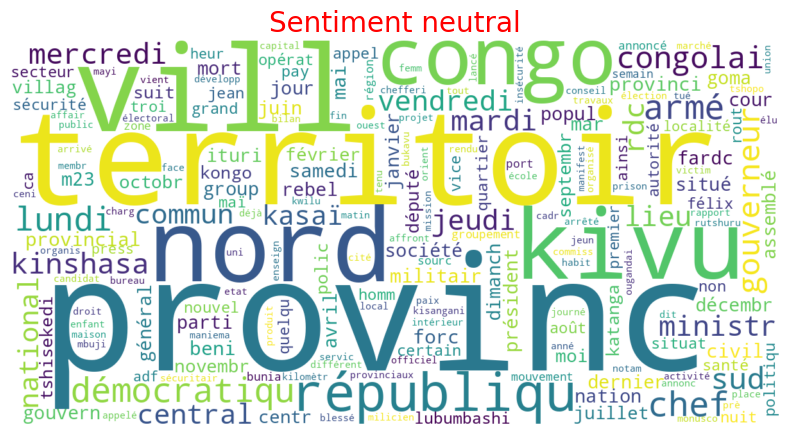

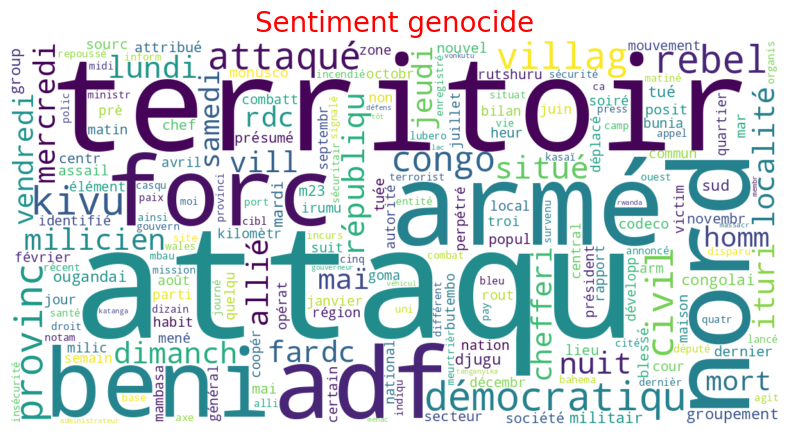

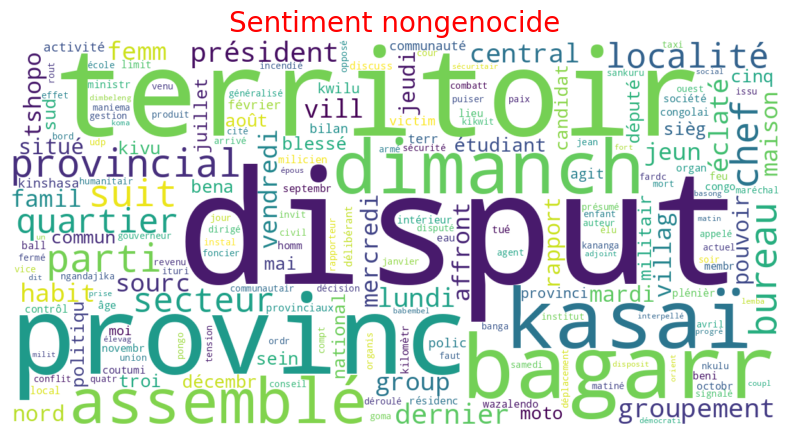

In [81]:
# Generic tweets
plt_wordcloud (raw_genocide,'neutral')
plt_wordcloud (raw_genocide,'genocide')
plt_wordcloud (raw_genocide,'nongenocide')

In [83]:
df_M1.groupby('label').describe().T

label                            genocide                        neutral  \
date count                           1528                          30979   
     mean   2021-03-16 21:19:47.434554880  2021-08-26 16:50:54.869427712   
     min              2014-01-16 00:00:00            2014-01-15 00:00:00   
     25%              2019-08-07 00:00:00            2019-12-02 00:00:00   
     50%              2021-04-20 12:00:00            2022-03-05 00:00:00   
     75%              2023-01-19 00:00:00            2023-10-28 00:00:00   
     max              2025-07-02 00:00:00            2025-07-04 00:00:00   

label                         nongenocide  
date count                             76  
     mean   2021-12-03 12:37:53.684210432  
     min              2014-10-21 00:00:00  
     25%              2020-07-22 12:00:00  
     50%              2022-07-10 12:00:00  
     75%              2023-11-05 12:00:00  
     max              2025-06-11 00:00:00

### 2nd method for word cloud
Below, we further explore about the data by label groups. Let's create a WordCloud and distribution bar chart to visualize the data.

In [84]:
# get all the no threat and threat news
genocid_news = df_M1[df_M1.label =='genocide']
nongenocid_news = df_M1[df_M1.label=='nongenocide']
neutral_news = df_M1[df_M1.label=='neutral']


In [85]:
import numpy as np

# For nongenocid, genocid and neutral news, create numpy list to visualize using wordcloud
genocid_news_text = " ".join(genocid_news.news.to_numpy().tolist())
nongenocid_news_text = " ".join(nongenocid_news.news.to_numpy().tolist())
neutral_news_text = " ".join(neutral_news.news.to_numpy().tolist())

In [86]:
genocid_news_text[:300]

'au moins quatorze personnes ont été tuées dans une attaque attribuée aux miliciens communautaires codeco dans une zone minière dans le nord-est de la république démocratique du congo, a-t-on appris mardi de sources locales et de l’armée. les bandits armés non encore identifiés ont attaqué ce jeudi 1'

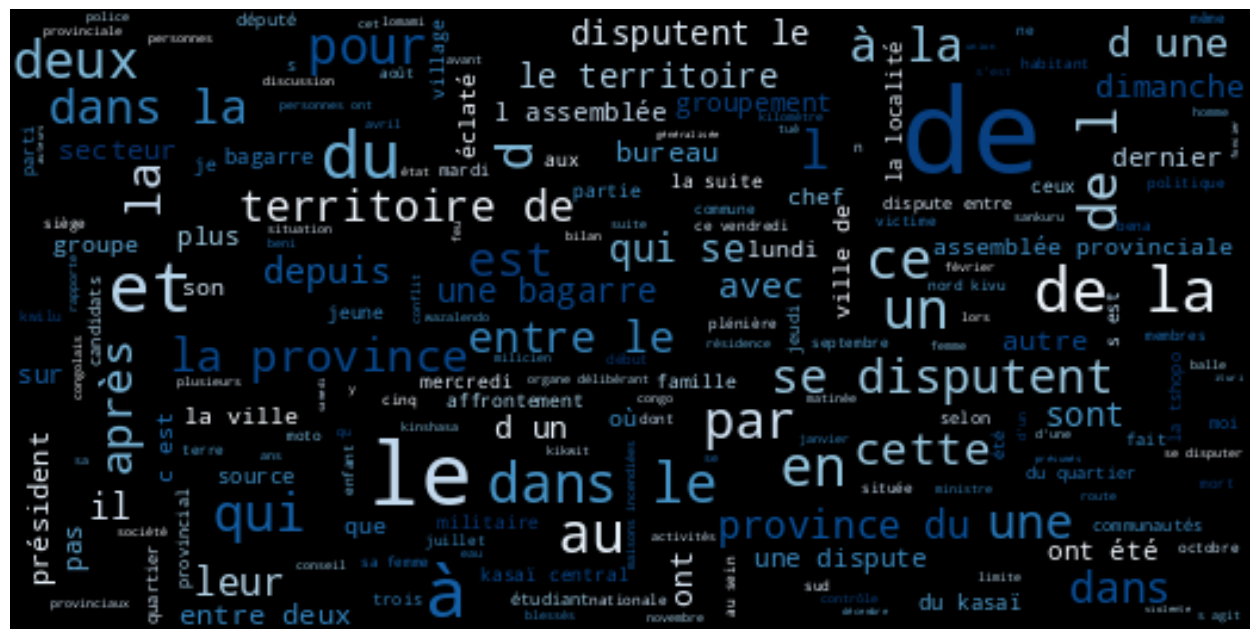

In [87]:
# wordcloud of nongenocid news
nongenocid_news_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50,
                                background_color ="black", colormap='Blues').generate(nongenocid_news_text)
plt.figure(figsize=(16,10))
plt.imshow(nongenocid_news_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

The nothreat news WordCloud above shows that words like population, elections, politique, ville, vote, etc are most commonly appeared word in no threat news.\

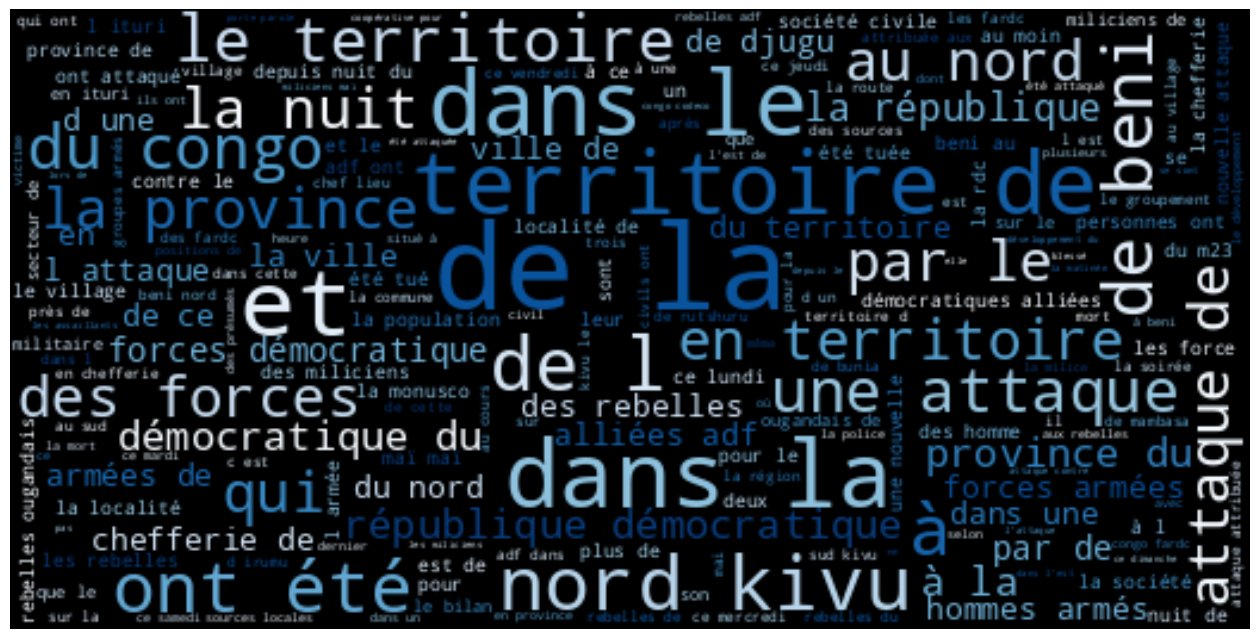

In [88]:
# wordcloud of genocid news
genocid_news_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50,
                          background_color ="black", colormap='Blues').generate(genocid_news_text)
plt.figure(figsize=(16,10))
plt.imshow(genocid_news_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

The threat news WordCloud above shows that words commission, population, félix Tshisekedi, élections, République, élections etc are most commonly appeared word in threat news.

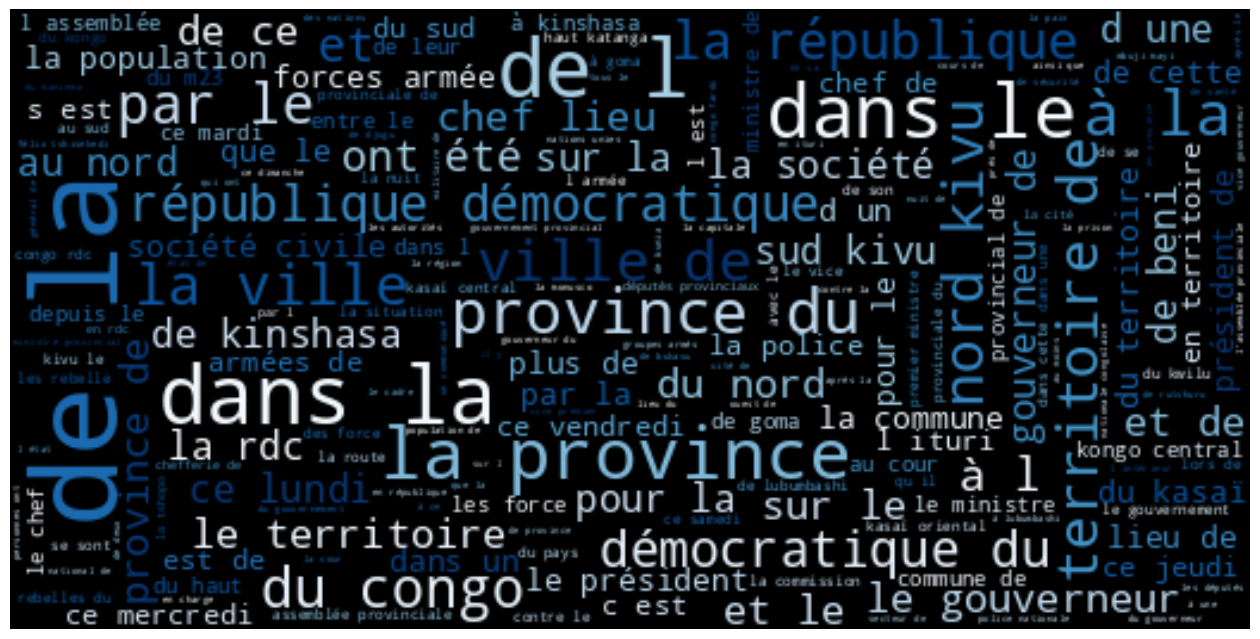

In [89]:
# wordcloud of genocid news
neutral_news_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50,
                          background_color ="black", colormap='Blues').generate(neutral_news_text)
plt.figure(figsize=(16,10))
plt.imshow(neutral_news_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

Text(0.5, 1.0, 'Distribution of nongenocide, neutral and genocide news')

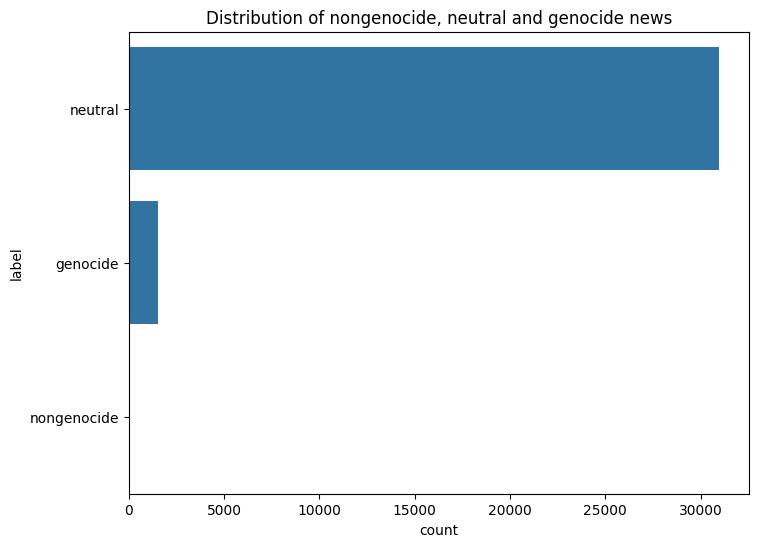

In [90]:
# we can observe imbalance data here.
plt.figure(figsize=(8,6))
sns.countplot(df_M1.label)
plt.title('Distribution of nongenocide, neutral and genocide news')

In [91]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [93]:
sm = SMOTE(random_state=42)
neutral_newsres, nongenocid_news_res, genocid_news_res = sm.fit_resample(df_M1.label['neutral'], y)

KeyError: 'neutral'

In [ ]:
# one way to fix it is to downsample the neutral news
neutral_news_df = neutral_news.sample(n = len(genocid_news), random_state = 44)
nongenocid_news_df =nongenocid_news.sample(n = len(nongenocid_news), random_state = 44)
genocid_news_df = genocid_news.sample(n = len(genocid_news), random_state = 44)

In [ ]:
# Create a dataframe with these nongenocid, neutral and genocid news
news_df = pd.concat([neutral_news_df, genocid_news_df, nongenocid_news_df])
news_df = news_df.drop(['author','news'], axis=1)
news_df.head()

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(news_df.label)
plt.title('Distribution of nongenocid, neutral and genocid news(after downsampling)')
plt.xlabel('News types')

Next, a final dataframe is created and calculated the text length column. We further explored length of each of the text by lable types. On average, the notheat news has length of words whereas threat news has .

In [ ]:
# Get length column for each text
news_df['text_length'] = news_df['new_text'].apply(len)

#Calculate average length by label types
labels = news_df.groupby('label').count()
labels

In [ ]:
#news_df['news_type']= news_df['label'].apply(lambda x: 1 if x =='politique' else 0)
news_df['news_type']= news_df['label'].map({'nongenocide': -1, 'neutral': 0, 'genocide': 1})
msg_label =news_df['news_type'].values
# Split data into train and test
train_msg, test_msg, train_labels, test_labels = train_test_split(news_df['new_text'], msg_label, test_size=0.2, random_state=434)

In [ ]:
news_df['news_type'].unique()

In [ ]:
news_df.head()

In [ ]:
# Defining pre-processing hyperparameters
max_len = 50 # pad_sequencs parameter, it idicates we are only going to look for 50 words in a sentence
trunc_type = "post" # pad_sequences parameter
padding_type = "post" # pad_sequences parameter
oov_tok = "<OOV>" # out of vocabulary token
vocab_size = 500

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)

In [ ]:
word_index = tokenizer.word_index
word_index

In [ ]:
# check how many words
tot_words = len(word_index)
print('There are %s unique tokens in training data. ' % tot_words)

#3. Model preparation
Prepare the data to classification algorithms
✓ Value: 'new_text' (cleaned generic news)
✓ Target: 'label' (sentiment)
✓ Split data randomly into training data (75%) and test data(25%)
✓ Features extraction: Bag of Words (word frequency) and TF-IDF
  (Only consider the top 2000 max_features)

In [ ]:
# Value and Target
raw_genocides = news_df
X = raw_genocides['new_text']
y = raw_genocides['news_type']

# Split data randomly into training data (70%) and test data(30%)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=66)
# Bag of Words (word frequency)
vec_wf = CountVectorizer(stop_words='english', max_features = 2000).fit(X_train)
X1_train = vec_wf.transform(X_train)
X1_test = vec_wf.transform(X_test)
# TF-IDF
vec_tfidf = TfidfVectorizer(stop_words='english', max_features = 2000).fit(X_train)
X2_train = vec_tfidf.transform(X_train)
X2_test = vec_tfidf.transform(X_test)

In [ ]:
[X2_train.shape,X2_test.shape,y_train.shape,y_test.shape]

Part 4.1
Try two different types of features, Bag of Words (word frequency) and TF-IDF on 7 classification models: (hyperparameter tuning for some models) ✓ logistic regression (tune C to avoid overfitting) ✓ Naive Bayes (tune smoothing parameter alpha) ✓ Decision trees, Random Forest (tune max_depth to avoid overvitting) ✓ XGBoost ✓ k-NN, SVM (no hyperparameter tuning due to slow algorithm)

Train models on the training data from generic tweets, and apply trained model to the test data to obtain an accuracy value.

Model with highest testing accuracy: Logistic regression with Bagofword features

# 1. Logistic Regression

In [ ]:
lr = LogisticRegression(penalty='l1', solver = 'liblinear', random_state=66)
grid = GridSearchCV(lr, {'C':[0.01, 0.1, 1, 10, 100]},
                    scoring='accuracy', cv=10, n_jobs=-1)
# Bag of Words (word frequency)
grid.fit(X1_train, y_train)
best_hyper = grid.best_params_
print('The best parameter:', best_hyper)

lr_wf = LogisticRegression(C=best_hyper['C'], penalty='l1', solver = 'liblinear', random_state=66)
lr_wf.fit(X1_train, y_train)

# predict on train and test set
y_train_predict = lr_wf.predict(X1_train)
y_test_predict = lr_wf.predict(X1_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_train, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_test, y_test_predict)))

In [ ]:
# ROC curves - Train set
scores_train = lr_wf.predict_proba(X1_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
auc_train = auc(fpr_train, tpr_train)

# ROC curves - Test Data
scores_test = lr_wf.predict_proba(X1_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('LR ROC curves - Generic Tweets', fontsize = 18)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
# TF-IDF
grid.fit(X2_train, y_train)
best_hyper = grid.best_params_
print('The best parameter:', best_hyper)

lr_tfidf = LogisticRegression(C=best_hyper['C'], penalty='l1', solver = 'liblinear', random_state=66)
lr_tfidf.fit(X2_train, y_train)

# predict on train and test set
y_train_predict = lr_tfidf.predict(X2_train)
y_test_predict = lr_tfidf.predict(X2_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_train, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_test, y_test_predict)))

Part 4.2
Apply trained model with best performance on the Canadian Elections data.
✓ Logistic regression with Bagofword, Accuracy=0.6184

The prediction accuracy is only 61.84%. Exploring more by visualizing the sentiment prediction results and the true sentiment for
each of the 3 parties/candidates.

Discuss whether NLP analytics based on tweets is useful for political parties during election campaigns.
✓ For all parties, large amount of tweets with positive sentiment are predicted have negative sentimen, that's why the testing
accuracy are only around 60%. This error apply for all parties, the liberal party still has the highest public support on Twiiter.
So the NLP analytics based on tweets are still useful. Use tweets related to political topic might be better.

In [ ]:
# Logistic regression with Bagofword
X = vec_wf.transform(raw_genocides['new_text'])
y = raw_genocides['news_type']

y_predict = lr_wf.predict(X)
accuracy = accuracy_score(y, y_predict)
print("Accuracy: {}".format(accuracy))

In [ ]:
# ROC curves - DRCongo Elections data
scores_test = lr_wf.predict_proba(X)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y, scores_test)
auc_test  = auc(fpr_test, tpr_test)


# Plotting
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('LR ROC curves - DRCongo Elections', fontsize = 18)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
raw_genocides['predicted_label'] = lr_wf.predict(X)
raw_genocides.head()

In [ ]:
sns.countplot(x='genocid_issue', hue='label', data=raw_genocides)
plt.xticks(rotation=60)
plt.title ('True Sentiment')
plt.show()

sns.countplot(x='genocid_issue', hue='predicted_label', data=raw_genocides)
plt.xticks(rotation=60)
plt.title ('Sentiment Prediction Results')
plt.show()

In [ ]:
# tribalism
confusion_matrix_conservative = confusion_matrix(y_true = raw_genocides[raw_genocides.genocid_issue == 'region']['news_type'],
                    y_pred = raw_genocides[raw_genocides.genocid_issue == 'region']['predicted_label'])
# Turn to dataframe
df_cm = pd.DataFrame( confusion_matrix_conservative, index=[-1,0,1], columns=[-1,0,1], )
# Create image
figsize = (7,5)
fontsize=14
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size":20})
plt.ylabel('True label')
plt.xlabel('Predicted_label')
plt.title("region issue",fontsize=20)
plt.show()

In [ ]:
# opinion
confusion_matrix_conservative = confusion_matrix(y_true = raw_genocides[raw_genocides.genocid_issue == 'actors']['news_type'],
                    y_pred = raw_genocides[raw_genocides.genocid_issue == 'actors']['predicted_label'])
df_cm = pd.DataFrame( confusion_matrix_conservative, index=[-1,0,1], columns=[-1,0,1], )
# Create image
figsize = (7,5)
fontsize=14
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size":20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("actors issue",fontsize=20)
plt.show()

In [ ]:
# Social
confusion_matrix_conservative = confusion_matrix(y_true = raw_genocides[raw_genocides.genocid_issue == 'reaction']['news_type'],
                    y_pred = raw_genocides[raw_genocides.genocid_issue == 'reaction']['predicted_label'])
df_cm = pd.DataFrame( confusion_matrix_conservative, index=[0,1], columns=[0,1], )
# Create image
figsize = (7,5)
fontsize=14
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.0f',annot_kws={"size":20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("reaction",fontsize=20)
plt.show()

Part 4.3
✓ Value: 'new_text' (cleand election tweets)
✓ Target: 'negative_reason'  
✓ Split the negative Canadian elections tweets into training data (70%) and test data (30%).
✓ Features extraction: Bag of Words (word frequency) and TF-IDF

Train multi-class classification models to predict the reason for the negative tweets.
Tune the hyperparameters and chose the model with best score to test your prediction reason for negative sentiment tweets.

Model with best performance: Logistic regression with Bagofword. Prediction accuracy is 0.6126.

In [ ]:
negative_genocides = raw_genocides[raw_genocides.news_type == 1]

# Value and Target
X = negative_genocides['new_text']
y = negative_genocides['category']

# Split data randomly into training data (70%) and test data(30%)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=66)
# Bag of Words (word frequency)
vec_wf = CountVectorizer(stop_words = 'english', max_features = 5000).fit(X_train)
X1_train = vec_wf.transform(X_train)
X1_test = vec_wf.transform(X_test)
# TF-IDF
vec_tfidf = TfidfVectorizer(stop_words= 'english', max_features = 5000).fit(X_train)
X2_train = vec_tfidf.transform(X_train)
X2_test = vec_tfidf.transform(X_test)

1. Logistic Regression

In [ ]:
lr = LogisticRegression(solver = 'liblinear',penalty='l1', random_state=66)
grid = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10,100]}, scoring='accuracy', cv=10, n_jobs=-1)
# Bag of Words (word frequency)
grid.fit(X1_train, y_train)
best_hyper = grid.best_params_
print('The best parameter:', best_hyper)

lr_wf = LogisticRegression(C=best_hyper['C'], penalty='l1', solver = 'liblinear', random_state=66)
lr_wf.fit(X1_train, y_train)

# predict on train and test set
y_train_predict = lr_wf.predict(X1_train)
y_test_predict = lr_wf.predict(X1_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_train, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_test, y_test_predict)))

In [ ]:
reason_order = ['provinces', 'politique', 'société', 'Science & env.']
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(ax=axes[0],x = y_test,order=reason_order)
axes[0].set_title('True Negative Reason')
axes[0].tick_params(labelrotation=60)
axes[0].set_ylim([0, 20])

sns.countplot(ax=axes[1],x = lr_wf.predict(X1_test),order=reason_order)
axes[1].set_title('Predicted Negative Reason')
axes[1].tick_params(labelrotation=60)
axes[1].set_ylim([0, 20])

In [ ]:
# TF-IDF
grid.fit(X2_train, y_train)
best_hyper = grid.best_params_
print('The best parameter:', best_hyper)

lr_tfidf = LogisticRegression(C=best_hyper['C'], penalty='l1', solver = 'liblinear', random_state=66)
lr_tfidf.fit(X2_train, y_train)

# predict on train and test set
y_train_predict = lr_tfidf.predict(X2_train)
y_test_predict = lr_tfidf.predict(X2_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_train, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_test, y_test_predict)))

2. SVM

In [ ]:
supportvm = svm.SVC(random_state=66)
grid = GridSearchCV(supportvm, {'C':np.arange(1,11,1)},
                    scoring='accuracy', cv=10, n_jobs=-1)
# Bag of Words (word frequency)
grid.fit(X1_train, y_train)
best_hyper = grid.best_params_
print('The best parameter:', best_hyper)

svm_wf = svm.SVC(C=best_hyper['C'], random_state=66)
svm_wf.fit(X1_train, y_train)

# predict on train and test set
y_train_predict = svm_wf.predict(X1_train)
y_test_predict = svm_wf.predict(X1_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_train, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_test, y_test_predict)))

In [ ]:
# TF-IDF
grid.fit(X2_train, y_train)
best_hyper = grid.best_params_
print('The best parameter:', best_hyper)

svm_tfidf = svm.SVC(C=best_hyper['C'], random_state=66)
svm_tfidf.fit(X2_train, y_train)

# predict on train and test set
y_train_predict = svm_tfidf.predict(X2_train)
y_test_predict = svm_tfidf.predict(X1_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_train, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_test, y_test_predict)))

3. Random Forest

In [ ]:
forest = RandomForestClassifier(criterion="gini", random_state=66,n_estimators=100,max_depth=50)
grid = GridSearchCV(forest, {'min_samples_split':[10,20,30,40,50,100,500]}, scoring = 'accuracy', cv=10, n_jobs=-1)
# Bag of Words (word frequency)
grid.fit(X1_train, y_train)
best_hyper = grid.best_params_
print('The best parameter:', best_hyper)

forest_wf = RandomForestClassifier(min_samples_split=best_hyper['min_samples_split'],
                                   n_estimators = 100, criterion="gini", random_state=66, max_depth=50)
forest.fit(X1_train, y_train)

# predict on train and test set
y_train_predict = forest.predict(X1_train)
y_test_predict = forest.predict(X1_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_train, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_test, y_test_predict)))

In [ ]:
# TF-IDF
grid.fit(X2_train, y_train)
best_hyper = grid.best_params_
print('The best parameter:', best_hyper)

forest_tfidf = RandomForestClassifier(min_samples_split=best_hyper['min_samples_split'],
                                      n_estimators = 100, criterion="gini", random_state=66, max_depth=50)
forest_tfidf.fit(X2_train, y_train)

# predict on train and test set
y_train_predict = forest_tfidf.predict(X2_train)
y_test_predict = forest_tfidf.predict(X1_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_train, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_test, y_test_predict)))

4. N-grams (CountVectorizer): unigrams and **bigrams**

In [ ]:
# N-grams (CountVectorizer): unigrams and bigrams
vec_ngram_wf = CountVectorizer(ngram_range=(1,2), stop_words='english', max_features = 5000).fit(X_train)
X3_train = vec_ngram_wf.transform(X_train)
X3_test = vec_ngram_wf.transform(X_test)
lr = LogisticRegression(solver = 'liblinear', random_state=66)
grid = GridSearchCV(lr, {'C':[0.01, 0.1, 1, 10, 100], 'penalty':('l1','l2')},
                    scoring='accuracy', cv=10, n_jobs=-1)
grid.fit(X3_train, y_train)
best_hyper = grid.best_params_
print('The best parameter:', best_hyper)

lr_ngram_wf = LogisticRegression(C= best_hyper['C'], penalty=best_hyper['penalty'], solver = 'liblinear', random_state=66)
lr_ngram_wf.fit(X3_train, y_train)

# predict on train and test set
y_train_predict = lr_ngram_wf.predict(X3_train)
y_test_predict = lr_ngram_wf.predict(X3_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_train, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_test, y_test_predict)))

5. N-grams (TfidfVectorizer): unigrams and **bigrams**

In [ ]:
# N-grams (TfidfVectorizer): unigrams and bigrams
vec_ngram_idf = TfidfVectorizer(ngram_range=(1,2), stop_words='english', max_features = 5000).fit(X_train)
X4_train = vec_ngram_idf.transform(X_train)
X4_test = vec_ngram_idf.transform(X_test)
lr = LogisticRegression(solver = 'liblinear', random_state=66)
grid = GridSearchCV(lr, {'C':[0.01, 0.1, 1, 10, 100], 'penalty':('l1','l2')},
                    scoring='accuracy', cv=10, n_jobs=-1)
grid.fit(X4_train, y_train)
best_hyper = grid.best_params_
print('The best parameter:', best_hyper)

lr_ngram_idf = LogisticRegression(C=best_hyper['C'], penalty=best_hyper['penalty'], solver = 'liblinear', random_state=66)
lr_ngram_idf.fit(X4_train, y_train)

# predict on train and test set
y_train_predict = lr_ngram_idf.predict(X4_train)
y_test_predict = lr_ngram_idf.predict(X4_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_train, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_test, y_test_predict)))

6. MLPClassifier

In [ ]:
mlp = MLPClassifier(activation='logistic',alpha=1,learning_rate='adaptive',max_iter=500,random_state=66)
mlp.fit(X1_train, y_train)

# predict on train and test set
y_train_predict = mlp.predict(X1_train)
y_test_predict = mlp.predict(X1_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_train, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_test, y_test_predict)))

1D CNN

In [ ]:
# Defining pre-processing hyperparameters
max_len = 50 # pad_sequencs parameter, it idicates we are only going to look for 50 words in a sentence
trunc_type = "post" # pad_sequences parameter
padding_type = "post" # pad_sequences parameter
oov_tok = "<OOV>" # out of vocabulary token
vocab_size = 500
n_unique_words = 10000

## Sequencing and Padding

Once tokenization is done, let's represent each sentence by sequences of numbers using texts_to_sequences from tokenizer object. Subsequently, we padded the sequence so that we can have same length of each sequence. Sequencing and padding are done for both training and testing data.

In [ ]:
# Sequencing and padding on training and testing
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences (training_sequences, maxlen = max_len,
                                 padding = padding_type, truncating = trunc_type )

testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,
                              padding = padding_type, truncating = trunc_type)

In [ ]:
# Shape of train tensor
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

In [ ]:
# Before padding : first sequence is 411 character long where as second one is 657
len(training_sequences[0]), len(training_sequences[1])

In [ ]:
# Padded to same length of 50
len(training_padded[0]), len(training_padded[1])

In [ ]:
# As can be seen from below, the padded sequence is 50 words long.
print(training_padded[0])

## Train the Model

In [ ]:
vocab_size = 500 # Number of words you want to tokenize i.e maximum number of words to keep
embeding_dim = 16
drop_value = 0.2 # dropout
n_dense = 24

In [ ]:
#Dense sentiment model architecture
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
# Compile model
#from tensorflow import keras
# Using Adam optimiser which makes use of momentum to avoid local minima
#optim = keras.optimizers.Adam(learning_rate=0.00001)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy', 'auc'])

In [ ]:
# fitting a dense spam detector model
num_epochs = 100
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_labels, epochs=num_epochs,
                    validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

In [ ]:
# Model performermance on test data is about 0.8582 accuracy with validation loss of 0.2901.
model.evaluate(testing_padded, test_labels)

In [ ]:
scores_dense = model.evaluate(testing_padded, test_labels, verbose=1)
print('Testing loss \t', scores_dense[0]*100)
print('Testing accuracy ', scores_dense[1]*100)

In [ ]:
metrics = pd.DataFrame(history.history)
metrics[:2]

In [ ]:
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
metrics[:2]

In [ ]:
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Dense Classifier: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

In [ ]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

Print the accuracy of train and valid data:

In [ ]:
train_dense_results = model.evaluate(training_padded, np.asarray(train_labels), verbose=2, batch_size=256)
valid_dense_results = model.evaluate(testing_padded, np.asarray(test_labels), verbose=2, batch_size=256)
print(f'Train accuracy: {train_dense_results[1]*100:0.2f}')
print(f'Valid accuracy: {valid_dense_results[1]*100:0.2f}')

In [ ]:
# Create a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'auc': 'Training_AUC',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy', 'val_auc': 'Validation_AUC'}, inplace = True)

# Create a figure and axes objects
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot the graphs on the appropriate axes
def plot_graphs3(var1, var2, string, ax_index):
    metrics[[var1, var2]].plot(ax=ax[ax_index])
    ax[ax_index].set_title('Dense Model: Training and Validation ' + string)
    ax[ax_index].set_xlabel('Number of epochs')
    ax[ax_index].set_ylabel(string)
    ax[ax_index].legend([var1, var2])

plot_graphs3('Training_Loss', 'Validation_Loss', 'loss', 0)
plot_graphs3('Training_Accuracy', 'Validation_Accuracy', 'accuracy', 1)
plot_graphs3('Training_AUC', 'Validation_AUC', 'auc', 2)

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

## Long Short Term Memory (LSTM) layer architecture

In [ ]:
#LSTM layer arcitecture hyperparameters
n_lstm = 128
drop_lstm = 0.2

In [ ]:
#LSTM Spam detection architecture
model1 = Sequential()
model1.add(Embedding(vocab_size, 128, input_length=max_len)) # Create an instance of Embedding with appropriate parameters
model1.add(SpatialDropout1D(drop_lstm))
model1.add(LSTM(n_lstm, return_sequences=False))
model1.add(Dropout(drop_lstm))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
model1.summary()

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', 'auc'])

In [ ]:
# Training
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', 'auc'])
num_epochs = 100
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history_lstm = model1.fit(training_padded, train_labels, epochs=num_epochs,
                    validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

In [ ]:
# Create a dataframe
metrics = pd.DataFrame(history_lstm.history)

In [ ]:
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs2(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

In [ ]:
plot_graphs2('Training_Loss', 'Validation_Loss', 'loss')

In [ ]:
plot_graphs2('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
scores_lstm = model1.evaluate(testing_padded, test_labels, verbose=1)
print('Testing loss \t', scores_lstm[0]*100)
print('Testing accuracy ', scores_lstm[1]*100)

In [ ]:
# Create a dataframe
metrics = pd.DataFrame(history_lstm.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'auc': 'Training_AUC',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy', 'val_auc': 'Validation_AUC'}, inplace = True)

# Create a figure and axes objects
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot the graphs on the appropriate axes
def plot_graphs3(var1, var2, string, ax_index):
    metrics[[var1, var2]].plot(ax=ax[ax_index])
    ax[ax_index].set_title('LSTM Model: Training and Validation ' + string)
    ax[ax_index].set_xlabel('Number of epochs')
    ax[ax_index].set_ylabel(string)
    ax[ax_index].legend([var1, var2])

plot_graphs3('Training_Loss', 'Validation_Loss', 'loss', 0)
plot_graphs3('Training_Accuracy', 'Validation_Accuracy', 'accuracy', 1)
plot_graphs3('Training_AUC', 'Validation_AUC', 'auc', 2)

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

## Biderectional LSTM (Bi-LSTM) Spam detection architecture

Below, we can see the Bi-derectional LSTM architechure where only difference than LSTM is that we use Bidirectional wrapper to LSTM.

Here we have made a model without an attention mechanism. Let’s see the results.

Defining a Bi-LSTM model.[texte du lien](https://analyticsindiamag.com/topics/bi-lstm-with-attention-mechanism/?ts=1737349842)

In [ ]:
model2 = Sequential()
model2.add(Embedding(vocab_size,
                     embeding_dim,
                     input_length = max_len))
model2.add(Bidirectional(LSTM(n_lstm,
                              return_sequences = False)))
model2.add(Dropout(drop_lstm))
model2.add(Dense(1, activation='sigmoid'))
# Assuming model2 is a Keras model object

In [ ]:
model2.summary()

In [ ]:
# Assuming model2 is a Keras model object
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'auc']) # Ensure 'AUC' is used, not 'auc'

# Training
num_epochs = 100
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 2)
history_bi = model2.fit(training_padded,
                     train_labels,
                     epochs = num_epochs,
                     validation_data = (testing_padded, test_labels),
                     callbacks = [early_stop],
                     verbose = 2)

# Evaluation
scores_bi = model2.evaluate(testing_padded, test_labels, verbose=1, return_dict=True) # Add return_dict=True
print('Testing loss \t', scores_bi['loss']*100) # Access loss using 'loss' key
print('Testing accuracy ', scores_bi['accuracy']*100) # Access accuracy using 'accuracy' key
print('Testing auc ', scores_bi['auc']*100) # Access AUC using 'AUC' key

In [ ]:
# Create a dataframe
metrics = pd.DataFrame(history_bi.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'auc': 'Training_AUC',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy', 'val_auc': 'Validation_AUC'}, inplace = True)

# Create a figure and axes objects
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot the graphs on the appropriate axes
def plot_graphs3(var1, var2, string, ax_index):
    metrics[[var1, var2]].plot(ax=ax[ax_index])
    ax[ax_index].set_title('BiLSTM Model: Training and Validation ' + string)
    ax[ax_index].set_xlabel('Number of epochs')
    ax[ax_index].set_ylabel(string)
    ax[ax_index].legend([var1, var2])

plot_graphs3('Training_Loss', 'Validation_Loss', 'loss', 0)
plot_graphs3('Training_Accuracy', 'Validation_Accuracy', 'accuracy', 1)
plot_graphs3('Training_AUC', 'Validation_AUC', 'auc', 2)

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

In [ ]:
scores_bi = model2.evaluate(testing_padded, test_labels, verbose=1)
print('Testing loss \t', scores_bi[0]*100)
print('Testing accuracy ', scores_bi[1]*100)
print('Testing auc ', scores_bi[2]*100)

Here we can see the losses and the accuracy of the model now we will define an attention layer.

Importing the libraries.

In [ ]:
from keras.layers import *
from keras.models import *
from keras import backend as K

Defining the attention class.

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Layer, Dense, Activation
from tensorflow.keras import initializers

class attention(Layer):
    def __init__(self, return_sequences=True,**kwargs):
        # Add the keyword argument to super().__init__
        super(attention, self).__init__(**kwargs)
        self.return_sequences = return_sequences
        self.W = None
        self.b = None
        self.u = None

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], input_shape[-1]),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[-1],),
                                 initializer="zeros")
        self.u = self.add_weight(name="att_context_vector", shape=(input_shape[-1], 1),
                                 initializer="normal")
        super(attention, self).build(input_shape)

    def call(self, x):
        # Alignment scores. Pass them through tanh function
        ui = keras.activations.tanh(keras.backend.dot(x, self.W) + self.b)

        # Remove dimension of size 1
        ai = keras.backend.dot(ui, self.u)[:, :, 0]

        # Apply softmax to get attention weights and then
        # multiply them with the input sequence
        ai = keras.activations.softmax(ai, axis=1)
        weighted_input = x * keras.backend.expand_dims(ai, axis=2)

        if self.return_sequences:
            return weighted_input
        else:
            return keras.backend.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        """
        For Keras internal compatibility checking
        """
        if self.return_sequences:
            return input_shape
        else:
            return input_shape[0], input_shape[-1]

    def get_config(self):
        """
        For saving and loading model with custom layer
        """
        config = super().get_config().copy()
        config.update({'return_sequences': self.return_sequences})
        return config

Here I have defined a class called attention in which I have defined two functions. Let’s see what these functions will do for the mechanism.

In [ ]:
def build(self, input_shape):
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")

In [ ]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K

class attention(tf.keras.layers.Layer):  # Inherit from tf.keras.layers.Layer
    def __init__(self, return_sequences=True, **kwargs): # Add return_sequences to __init__
        self.return_sequences = return_sequences  # Store return_sequences as an attribute
        super(attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="normal")
        super(attention, self).build(input_shape)

    def call(self, x):
        # Alignment scores. Pass them through tanh function
        e = tf.keras.activations.tanh(tf.keras.backend.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = tf.keras.backend.squeeze(e, axis=-1)
        # Compute the weights
        alpha = tf.keras.activations.softmax(e)
        # Reshape to tensorFlow format
        alpha = tf.keras.backend.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        # Return sequences or context vector based on return_sequences
        if self.return_sequences:
            return context
        else:
            return tf.keras.backend.sum(context, axis=1)


    # Add compute_output_shape for TensorFlow 2.x compatibility
    def compute_output_shape(self, input_shape):
        if self.return_sequences:
            return input_shape
        return (input_shape[0], input_shape[-1]) # Shape if not returning sequences


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, Flatten

In [ ]:
class attention(tf.keras.layers.Layer):  # Inherit from tf.keras.layers.Layer
    def __init__(self, return_sequences=True, **kwargs): # Add return_sequences to __init__
        self.return_sequences = return_sequences  # Store return_sequences as an attribute
        super(attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="normal")
        super(attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        if self.return_sequences:
          return output
        return K.sum(output, axis=1)

    # Add compute_output_shape for TensorFlow 2.x compatibility
    def compute_output_shape(self, input_shape):
        if self.return_sequences:
            return input_shape
        return (input_shape[0], input_shape[-1]) # Shape if not returning sequences

# Assuming 'vocab_size', 'embeding_dim', and 'max_len' are defined
model2_b = Sequential()
model2_b.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model2_b.add(Bidirectional(LSTM(64, return_sequences=True)))
model2_b.add(attention(return_sequences=True))  # receive 3D and output 3D
model2_b.add(Dropout(0.5))
model2_b.add(Flatten())  # Add a Flatten layer before the Dense layer
model2_b.add(Dense(1, activation='sigmoid'))
model2_b.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])

Here we can see that we have given an attention layer to the model. Let’s check for the results.

In [ ]:
num_epochs = 100
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 2)
history_biatt = model2_b.fit(training_padded,
                     train_labels,
                     epochs = num_epochs,
                     validation_data = (testing_padded, test_labels),
                     callbacks = [early_stop],
                     verbose = 2)
print(history_biatt.history['loss'])
print(history_biatt.history['accuracy'])
print(history_biatt.history['auc'])

In [ ]:
# Create a dataframe
metrics = pd.DataFrame(history_biatt.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'auc': 'Training_AUC',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy', 'val_auc': 'Validation_AUC'}, inplace = True)

# Create a figure and axes objects
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot the graphs on the appropriate axes
def plot_graphs3(var1, var2, string, ax_index):
    metrics[[var1, var2]].plot(ax=ax[ax_index])
    ax[ax_index].set_title('BiLSTM attention Model: Training and Validation ' + string)
    ax[ax_index].set_xlabel('Number of epochs')
    ax[ax_index].set_ylabel(string)
    ax[ax_index].legend([var1, var2])

plot_graphs3('Training_Loss', 'Validation_Loss', 'loss', 0)
plot_graphs3('Training_Accuracy', 'Validation_Accuracy', 'accuracy', 1)
plot_graphs3('Training_AUC', 'Validation_AUC', 'auc', 2)

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

In [ ]:
scores_biatt = model2_b.evaluate(testing_padded, test_labels, verbose=1)
print('Testing loss \t', scores_biatt[0]*100)
print('Testing accuracy ', scores_biatt[1]*100)
print('Testing auc ', scores_biatt[2]*100)

# Gated Recurrent Unit (GRU)

Very similar to LSTM but has two gates: reset gate and update gate.

### Define the GRU model architecture:

In [ ]:
model3 = Sequential()
model3.add(Embedding(vocab_size,
                     embeding_dim,
                     input_length = max_len))
model3.add(SpatialDropout1D(0.2))
model3.add(GRU(128, return_sequences = False))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation = 'sigmoid'))

###  summary of the model:

In [ ]:
model3.summary()

### Compile the model

In [ ]:
model3.compile(loss = 'binary_crossentropy',
                       optimizer = 'adam',
                       metrics=['accuracy', 'auc'])

### Train the model:

In [ ]:
num_epochs = 100
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history_gru = model3.fit(training_padded,
                     train_labels,
                     epochs=num_epochs,
                     validation_data=(testing_padded, test_labels),
                     callbacks =[early_stop],
                     verbose=2)
print(history_gru.history['loss'])
print(history_gru.history['accuracy'])
print(history_gru.history['auc'])

### Plot the loss and the accuracy of the GRU

In [ ]:
# Create a dataframe
metrics = pd.DataFrame(history_gru.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'auc': 'Training_AUC',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy', 'val_auc': 'Validation_AUC'}, inplace = True)

# Create a figure and axes objects
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot the graphs on the appropriate axes
def plot_graphs3(var1, var2, string, ax_index):
    metrics[[var1, var2]].plot(ax=ax[ax_index])
    ax[ax_index].set_title('BiLSTM attention Model: Training and Validation ' + string)
    ax[ax_index].set_xlabel('Number of epochs')
    ax[ax_index].set_ylabel(string)
    ax[ax_index].legend([var1, var2])

plot_graphs3('Training_Loss', 'Validation_Loss', 'loss', 0)
plot_graphs3('Training_Accuracy', 'Validation_Accuracy', 'accuracy', 1)
plot_graphs3('Training_AUC', 'Validation_AUC', 'auc', 2)

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

In [ ]:
scores_gru = model3.evaluate(testing_padded, test_labels, verbose=1)
print('Testing loss \t', scores_gru[0]*100)
print('Testing accuracy ', scores_gru[1]*100)
print('Testing accuracy ', scores_gru[2]*100)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

In [ ]:
# create the model
cnn_model = Sequential()

In [ ]:
cnn_model.add(Embedding(vocab_size,
                     embeding_dim,
                     input_length = max_len))
cnn_model.add(Conv1D(filters=16, kernel_size=2, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=3))
cnn_model.add(LSTM(n_lstm, return_sequences=False))
cnn_model.add(Dropout(drop_lstm))
#cnn_model.add(attention())
cnn_model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
print(cnn_model.summary())

In [ ]:
num_epochs = 100
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history_cc = cnn_model.fit(training_padded, train_labels, epochs=num_epochs,
                    validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

In [ ]:
# Create a dataframe
metrics = pd.DataFrame(history_cc.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'auc': 'Training_AUC',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy', 'val_auc': 'Validation_AUC'}, inplace = True)
# Create a figure and axes objects
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot the graphs on the appropriate axes
def plot_graphs3(var1, var2, string, ax_index):
    metrics[[var1, var2]].plot(ax=ax[ax_index])
    ax[ax_index].set_title('1D CNN + LSTM Model: Training and Validation' + string)
    ax[ax_index].set_xlabel('Number of epochs')
    ax[ax_index].set_ylabel(string)
    ax[ax_index].legend([var1, var2])

plot_graphs3('Training_Loss', 'Validation_Loss', 'loss', 0)
plot_graphs3('Training_Accuracy', 'Validation_Accuracy', 'accuracy', 1)
plot_graphs3('Training_AUC', 'Validation_AUC', 'auc', 2)

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()

In [ ]:
cnn_scores = cnn_model.evaluate(testing_padded, test_labels, verbose=1)
print('Testing loss \t', cnn_scores[0]*100)
print('Testing accuracy ', cnn_scores[1]*100)
print('Testing auc ', cnn_scores[2]*100)

In [ ]:
from keras import Model
from keras.layers import Layer, Input, LSTM, Dense
import tensorflow as tf
from keras.activations import tanh  # Import tanh from activations
from keras.metrics import mean_squared_error

# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self, **kwargs):
        super(attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], 1),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[1], 1),
                                 initializer='zeros', trainable=True)
        super(attention, self).build(input_shape)

    def call(self, x):
        # Alignment scores. Pass them through tanh function
        # Use tf.matmul for matrix multiplication
        e = tanh(tf.matmul(x, self.W) + self.b)
        # Remove dimension of size 1
        e = tf.squeeze(e, axis=-1)
        # Compute the weights
        alpha = tf.keras.activations.softmax(e)
        # Reshape to tensorFlow format
        alpha = tf.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = tf.reduce_sum(context, axis=1)
        return context

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Layer

class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")
        super(attention, self).build(input_shape)

    def call(self,x):
        et=tf.squeeze(tf.tanh(tf.matmul(x,self.W)+self.b),axis=-1)
        at=tf.nn.softmax(et)
        at=tf.expand_dims(at,axis=-1)
        output=x*at
        return tf.reduce_sum(output,axis=1)

### 1D CNN BiLSTM moDEl Network with Attention Layer

In [ ]:
def create_BilSTm_with_attention(hidden_units, dense_units, input_shape, activation):
    # Define input layer within function.
    x = Input(shape=input_shape)

    # Create LSTM layer and feed the input
    lstm_layer = LSTM(hidden_units, return_sequences=True, activation=activation)(x)

    # Create an instance of the attention layer
    attention_layer = attention()

    # Apply the attention layer to the LSTM output
    attention_output = attention_layer(lstm_layer)

    outputs = Dense(dense_units, trainable=True, activation='sigmoid')(attention_output)
    model = Model(x, outputs)
    #model.compile(loss='mse', optimizer='adam')
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

In [ ]:
time_steps = 50
hidden_units = 2

In [ ]:
from tensorflow.keras.layers import Layer, Input, LSTM, Dense
from tensorflow.keras.models import Model

class attention(Layer):
    def __init__(self, **kwargs):
        super(attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                              initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                              initializer="zeros")
        super(attention, self).build(input_shape)

    def call(self, x):
        # Alignment scores. Pass them through tanh function
        e = keras.activations.tanh(keras.backend.dot(x,self.W)+self.b)

        # Remove dimension of size 1
        e = keras.backend.squeeze(e, axis=-1)
        # Compute the weights
        alpha = keras.activations.softmax(e)

        # Reshape to tensorFlow format
        alpha = keras.backend.expand_dims(alpha, axis=-1)

        # Compute the context vector
        context = x * alpha
        context = keras.backend.sum(context, axis=1)

        return context

In [ ]:
def create_BilSTm_with_attention(hidden_units, dense_units, input_shape, activation):
    x = Input(shape=input_shape)
    lstm_layer = LSTM(hidden_units, return_sequences=True, activation=activation)(x)
    attention_layer = attention()
    attention_output = attention_layer(lstm_layer)
    outputs = Dense(dense_units, trainable=True, activation='sigmoid')(attention_output)
    model = Model(x, outputs)
    model.compile(loss='mse', optimizer='adam')
    return model

#make sure time_steps is correctly set to 50 before running the model
model_attention = create_BilSTm_with_attention(hidden_units=hidden_units, dense_units=1,
                                  input_shape=(time_steps,1), activation='tanh')
model_attention.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])

model_attention.summary()

In [ ]:
from tensorflow.keras.layers import Layer, Input, LSTM, Dense
from tensorflow.keras.models import Model
import tensorflow as tf # Import tensorflow

class attention(Layer):
    def __init__(self, **kwargs):
        super(attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                              initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                              initializer="zeros")
        super(attention, self).build(input_shape)

    def call(self, x):
        # Alignment scores. Pass them through tanh function
        e = tf.keras.activations.tanh(tf.keras.backend.dot(x,self.W)+self.b) # Use tf.keras.backend.dot

        # Remove dimension of size 1
        e = tf.keras.backend.squeeze(e, axis=-1) #Use tf.keras.backend.squeeze
        # Compute the weights
        alpha = tf.keras.activations.softmax(e) #Use tf.keras.activations.softmax

        # Reshape to tensorFlow format
        alpha = tf.keras.backend.expand_dims(alpha, axis=-1) #Use tf.keras.backend.expand_dims

        # Compute the context vector
        context = x * alpha
        #context = tf.keras.backend.sum(context, axis=1) #This line is causing the error remove it

        return context # Returning the 2D context directly # Return the 2D context

In [ ]:
def create_BilSTm_with_attention(hidden_units, dense_units, input_shape, activation):
    x = Input(shape=input_shape)
    lstm_layer = LSTM(hidden_units, return_sequences=True, activation=activation)(x)
    attention_layer = attention()
    attention_output = attention_layer(lstm_layer)
    # Apply a Flatten layer to convert the 2D output to 1D
    flatten_output = Flatten()(attention_output)
    outputs = Dense(dense_units, trainable=True, activation='sigmoid')(flatten_output)  # Connect to Dense layer
    model = Model(x, outputs)
    model.compile(loss='mse', optimizer='adam')
    return model

#make sure time_steps is correctly set to 50 before running the model
model_attention = create_BilSTm_with_attention(hidden_units=hidden_units, dense_units=1,
                                  input_shape=(time_steps,1), activation='tanh')
model_attention.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])

model_attention.summary()

In [ ]:
# create the model
#model_attention = Sequential()
#model_attention.add(Embedding(vocab_size,
 #                    embeding_dim,
 #                    input_length = max_len))
#model_attention.add(Conv1D(filters=16, kernel_size=2, padding='same', activation='relu'))
#model_attention.add(MaxPooling1D(pool_size=3))
#model_attention.add(LSTM(n_lstm, return_sequences=False))
#model_attention.add(attention())
#model_attention.add(Dropout(drop_lstm))
#model_attention.add(Dense(units=1, activation='sigmoid'))
#model_attention.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])

#model_attention.summary()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

num_epochs = 100
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 2)
# Train the model using encoded labels
history_biatt2 = model_attention.fit(training_padded,
                     train_labels_encoded, # Use encoded labels
                     epochs = num_epochs,
                     validation_data = (testing_padded, test_labels_encoded), # Use encoded labels
                     callbacks = [early_stop],
                     verbose = 2)
print(history_biatt2.history['loss'])
print(history_biatt2.history['accuracy'])
print(history_biatt2.history['auc'])

In [ ]:
scores_cnnAt = model_attention.evaluate(testing_padded, test_labels, verbose=1)
print('Testing loss \t', scores_cnnAt[0]*100)
print('Testing accuracy ', scores_cnnAt[1]*100)
print('Testing auc ', scores_cnnAt[2]*100)

Compare 7 different models
Based on loss, accuracy and the plots above, we can select Dense architecture as a final model for classifying the text messages. The Dense architecture model has validation accuracy of about xx% and loss of x%.

In [ ]:
# ... other code ...

# Ensure model2 is properly compiled before evaluation:
#model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])

# Comparing three different models
print(f"Dense architecture loss and accuracy: {model.evaluate(testing_padded, test_labels)} " )
print(f"LSTM architecture loss and accuracy: {model1.evaluate(testing_padded, test_labels)} " )
print(f"Bi-LSTM architecture loss and accuracy: {model2.evaluate(testing_padded, test_labels)} " )
print(f"Bi-LSTM Att architecture loss and accuracy: {model2_b.evaluate(testing_padded, test_labels)} " )
print(f"GRU model loss and accuracy: {model3.evaluate(testing_padded, test_labels)}")
print(f"1D CNN + LSTM model loss and accuracy: {cnn_model.evaluate(testing_padded, test_labels)}")
print(f"1D CNN + LSTM + Att model loss and accuracy: {model_attention.evaluate(testing_padded, test_labels)}")

The validation loss for these five models are 0.2901, 0.3322, 0.3973, 0.4069 and 0.376, respectively. And the validation accuracy are 0.8582, 0.9179, 0.9179, 0.903 and 0.9179.

Based on the loss, accuracy and the plots, we can conclude if the LSTM is the best model for this classification case, with the validation accuracy = 91.8 % and the loss = 33.22%

In [ ]:
# display long string
pd.options.display.max_colwidth=150
X_test[:3]

In [ ]:
predict_news = ["trent dont dix sept ex milicien auto défens femm enfant rendu camp casqu bleu indonésien monusco kalemi lundi janvier déposé arm marqu ak chargeur."]

In [ ]:
def predict_threat(predict_news):
    new_seq = tokenizer.texts_to_sequences(predict_news)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model2_b.predict(padded))
predict_threat(predict_news)

In [ ]:
#Creating a function to display values:
def show_values_on_bars(axs, h_v="v", space=0.2):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = "{:.2f}".format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = "{:.2f}".format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [ ]:
#Creating a dataframe to draw out comparisons

results=[]
results.append([scores_dense[0], 'Loss', 'Dense'])
results.append([scores_dense[1], 'Accuracy', 'Dense'])
results.append([scores_lstm[0], 'Loss', 'LSTM'])
results.append([scores_lstm[1], 'Accuracy', 'LSTM'])
results.append([scores_bi[0], 'Loss', 'Bi-LSTM'])
results.append([scores_bi[1], 'Accuracy', 'Bi-LSTM'])
results.append([scores_biatt[0], 'Loss', 'Bi-LSTM-Att'])
results.append([scores_biatt[1], 'Accuracy', 'Bi-LSTM-Att'])
results.append([scores_gru[0], 'Loss', 'GRU'])
results.append([scores_gru[1], 'Accuracy', 'GRU'])
results.append([cnn_scores[0], 'Loss', '1D CNN + LStM'])
results.append([cnn_scores[1], 'Accuracy', '1D CNN + LStM'])
results.append([scores_cnnAt[0], 'Loss', '1D CNN+LStM+Att'])
results.append([scores_cnnAt[1], 'Accuracy', '1D CNN+LStM+Att'])

In [ ]:
comparison = pd.DataFrame(results, columns = ['Score', 'Metric', 'Model'])

In [ ]:
plt.figure(figsize=(10,10))
plot = sns.barplot(x=comparison['Metric'],y=comparison['Score'], hue = comparison['Model'])

show_values_on_bars(plot)

In [ ]:
# N-grams (TfidfVectorizer): unigrams and bigrams
vec_ngram_idf = CountVectorizer(ngram_range=(1,2), stop_words='english', max_features = 5000).fit(train_msg)
Xtf_train = vec_ngram_idf.transform(train_msg)
Xtf_test = vec_ngram_idf.transform(test_msg)

In [ ]:
Xtf_train

In [ ]:
negative_elections = news_df[news_df.label == 'negative']

# Value and Target
X1 = negative_elections['new_text']
y1 = negative_elections['news_type']

# Split data randomly into training data (70%) and test data(30%)
X_traindf,X_testdf,y_traindf,y_testdf = train_test_split(X, y, test_size=0.3, random_state=66)
# Bag of Words (word frequency)
vec_wf = CountVectorizer(stop_words = 'english', max_features = 5000).fit(X_train)
X1_train = vec_wf.transform(X_traindf)
X1_test = vec_wf.transform(X_testdf)
# TF-IDF
vec_tfidf = TfidfVectorizer(stop_words= 'english', max_features = 5000).fit(X_train)
X2_train = vec_tfidf.transform(X_traindf)
X2_test = vec_tfidf.transform(X_testdf)

logestic regression

In [ ]:
lr = LogisticRegression(solver = 'liblinear',penalty='l1', random_state=66)
grid = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10,100]}, scoring='accuracy', cv=10, n_jobs=-1)
# Bag of Words (word frequency)
grid.fit(X1_train, y_traindf)
best_hyper = grid.best_params_
print('The best parameter:', best_hyper)

lr_wf = LogisticRegression(C=best_hyper['C'], penalty='l1', solver = 'liblinear', random_state=66)
lr_wf.fit(X1_train, y_traindf)

# predict on train and test set
y_train_predict = lr_wf.predict(X1_train)
y_test_predict = lr_wf.predict(X1_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_traindf, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_testdf, y_test_predict)))

In [ ]:
reason_order = ['politique', 'société', 'femme', 'sécurité', 'économie', 'santé', 'sport', 'revue de presse', 'justice']
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(ax=axes[0],x = y_testdf,order=reason_order)
axes[0].set_title('True Negative Reason')
axes[0].tick_params(labelrotation=60)
axes[0].set_ylim([0, 60])

sns.countplot(ax=axes[1],x = lr_wf.predict(X1_test),order=reason_order)
axes[1].set_title('Predicted Negative Reason')
axes[1].tick_params(labelrotation=60)
axes[1].set_ylim([0, 60])

In [ ]:
news_df['category'].sort_values(ascending=False)

In [ ]:
df6= news_df.groupby(['category'])['category'].count().sort_values(ascending=False)
print("Get count of each group:\n", df6)

In [ ]:
# TF-IDF
grid.fit(X2_train, y_traindf)
best_hyper = grid.best_params_
print('The best parameter:', best_hyper)

lr_tfidf = LogisticRegression(C=best_hyper['C'], penalty='l1', solver = 'liblinear', random_state=66)
lr_tfidf.fit(X2_train, y_traindf)

# predict on train and test set
y_train_predict = lr_tfidf.predict(X2_train)
y_test_predict = lr_tfidf.predict(X2_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_traindf, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_testdf, y_test_predict)))

In [ ]:
reason_order = ['provinces', 'société', 'politique', 'santé' ,'afrique', 'economie']
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(ax=axes[0],x = y_testdf,order=reason_order)
axes[0].set_title('True Negative Reason')
axes[0].tick_params(labelrotation=60)
axes[0].set_ylim([0, 100])

sns.countplot(ax=axes[1],x = lr_tfidf.predict(X2_test),order=reason_order)
axes[1].set_title('Predicted Negative Reason TF_IDF')
axes[1].tick_params(labelrotation=60)
axes[1].set_ylim([0, 100])

In [ ]:
# N-grams (CountVectorizer): unigrams and bigrams
vec_ngram_wf = CountVectorizer(ngram_range=(1,2), stop_words='english', max_features = 5000).fit(X_traindf)
X3_train = vec_ngram_wf.transform(X_traindf)
X3_test = vec_ngram_wf.transform(X_testdf)
lr = LogisticRegression(solver = 'liblinear', random_state=66)
grid = GridSearchCV(lr, {'C':[0.01, 0.1, 1, 10, 100], 'penalty':('l1','l2')},
                    scoring='accuracy', cv=10, n_jobs=-1)
grid.fit(X3_train, y_traindf)
best_hyper = grid.best_params_
print('The best parameter:', best_hyper)

lr_ngram_wf = LogisticRegression(C= best_hyper['C'], penalty=best_hyper['penalty'], solver = 'liblinear', random_state=66)
lr_ngram_wf.fit(X3_train, y_traindf)

# predict on train and test set
y_train_predict = lr_ngram_wf.predict(X3_train)
y_test_predict = lr_ngram_wf.predict(X3_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_traindf, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_testdf, y_test_predict)))

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(ax=axes[0],x = y_testdf,order=reason_order)
axes[0].set_title('True Negative Reason')
axes[0].tick_params(labelrotation=60)
axes[0].set_ylim([0, 100])

sns.countplot(ax=axes[1],x = lr_ngram_wf.predict(X3_test),order=reason_order)
axes[1].set_title('Predicted Negative Reason TF_IDF')
axes[1].tick_params(labelrotation=60)
axes[1].set_ylim([0, 100])

In [ ]:
lr = LogisticRegression(penalty='l1', solver = 'liblinear', random_state=66)
grid = GridSearchCV(lr, {'C':[0.01, 0.1, 1, 10, 100]},
                    scoring='accuracy', cv=10, n_jobs=-1)
# Bag of Words (word frequency)
grid.fit(X1_train, y_train)
best_hyper = grid.best_params_
print('The best parameter:', best_hyper)

lr_wf = LogisticRegression(C=best_hyper['C'], penalty='l1', solver = 'liblinear', random_state=66)
lr_wf.fit(X1_train, y_train)

# predict on train and test set
y_train_predict = lr_wf.predict(X1_train)
y_test_predict = lr_wf.predict(X1_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_train, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_test, y_test_predict)))

In [ ]:
# Import necessary library
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the test target variable
y_test_bin = label_binarize(y_test, classes=np.unique(y_train)) # Use unique classes from training set for consistency

# Plot ROC curves for each class
n_classes = y_test_bin.shape[1]
plt.figure(figsize=(10, 8)) # Adjust figure size as needed

for i in range(n_classes):
    # Get prediction scores for the current class
    scores_test = lr_wf.predict_proba(X1_test)[:, i]

    # Calculate ROC curve and AUC for the current class
    fpr_test, tpr_test, _ = roc_curve(y_test_bin[:, i], scores_test)
    auc_test = auc(fpr_test, tpr_test)

    # Plot ROC curve for the current class
    plt.plot(fpr_test, tpr_test, label='Class {0} (AUC = {1:0.2f})'.format(i, auc_test))

# Add plot elements
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# TF-IDF
grid.fit(X2_train, y_train)
best_hyper = grid.best_params_
print('The best parameter:', best_hyper)

lr_tfidf = LogisticRegression(C=best_hyper['C'], penalty='l1', solver = 'liblinear', random_state=66)
lr_tfidf.fit(X2_train, y_train)

# predict on train and test set
y_train_predict = lr_tfidf.predict(X2_train)
y_test_predict = lr_tfidf.predict(X2_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_train, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_test, y_test_predict)))

In [ ]:
# ROC curves - Train set
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

scores_train = lr_tfidf.predict_proba(X1_train)

# Compute ROC curve and ROC area for each class
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()
n_classes = y_train_bin.shape[1]

for i in range(n_classes):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], scores_train[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# ROC curves - Test Data
scores_test = lr_tfidf.predict_proba(X1_test)

# Compute ROC curve and ROC area for each class
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], scores_test[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Plotting
plt.figure()
for i in range(n_classes):
    plt.plot(fpr_train[i], tpr_train[i], label='Train set | Class {0} | AUC of {1:0.3f}'
             ''.format(i, roc_auc_train[i]))
    plt.plot(fpr_test[i], tpr_test[i], label='Test set | Class {0} | AUC of {1:0.3f}'
             ''.format(i, roc_auc_test[i]))
plt.plot([0, 1], [0, 1], color='k', linestyle='--', label='Random | AUC of 0.5')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR TF-IDF ROC curves - Generic news', fontsize=18)
plt.legend(loc="lower right", fontsize='8')
plt.show()

In [ ]:
# Logistic regression with Bagofword
X = vec_wf.transform(raw_genocides['new_text'])
y = raw_genocides['label']

y_predict = lr_wf.predict(X)
accuracy = accuracy_score(y, y_predict)
print("Accuracy: {}".format(accuracy))

In [ ]:
# ROC curves - DRCongo Elections data
X = vec_wf.transform(raw_genocides['new_text'])
# Convert string labels to binary values (0 or 1)
y = raw_genocides['label'].map({'nothreat': 0, 'threat': 1})

scores_test = lr_wf.predict_proba(X)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y, scores_test)
auc_test  = auc(fpr_test, tpr_test)


# Plotting
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('LR ROC curves - DRCongo Elections', fontsize = 18)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
raw_genocides['predicted_label'] = lr_wf.predict(X)

sns.countplot(x='genocid_issue', hue='label', data=raw_genocides)
plt.xticks(rotation=60)
plt.title ('True Sentiment')
plt.show()

sns.countplot(x='genocid_issue', hue='predicted_label', data=raw_genocides)
plt.xticks(rotation=60)
plt.title ('Sentiment Prediction Results')
plt.show()

In [ ]:
negative_gen = raw_genocides[raw_genocides.news_type == 0] # the issue is here, news_type is numerical

# Value and Target
X = negative_gen['new_text']
y = negative_gen['categories']

#Check if X and y are empty before splitting
if X.empty or y.empty:
    print("Warning: X or y is empty. train_test_split will fail.")
    #Handle the empty case, e.g., skip the split or raise an exception
else:
    # Split data randomly into training data (70%) and test data(30%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=66)
    # Bag of Words (word frequency)
    vec_wf = CountVectorizer(stop_words='english', max_features=5000).fit(X_train)
    X1_train = vec_wf.transform(X_train)
    X1_test = vec_wf.transform(X_test)
    # TF-IDF
    vec_tfidf = TfidfVectorizer(stop_words='english', max_features=5000).fit(X_train)
    X2_train = vec_tfidf.transform(X_train)
    X2_test = vec_tfidf.transform(X_test)

Logistique regression 2

In [ ]:
lr = LogisticRegression(solver = 'liblinear',penalty='l1', random_state=66)
grid = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10,100]}, scoring='accuracy', cv=10, n_jobs=-1)
# Bag of Words (word frequency)
grid.fit(X1_train, y_train)
best_hyper = grid.best_params_
print('The best parameter:', best_hyper)

lr_wf = LogisticRegression(C=best_hyper['C'], penalty='l1', solver = 'liblinear', random_state=66)
lr_wf.fit(X1_train, y_train)

# predict on train and test set
y_train_predict = lr_wf.predict(X1_train)
y_test_predict = lr_wf.predict(X1_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_train, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_test, y_test_predict)))

In [ ]:
reason_order = ['culture', 'femme', 'économie', 'sport', 'santé', 'revuedepresse',
                'justice', 'caricature', 'environnement', 'opinion', 'éducation', 'société,économie',
                'sécurité,magazineun,émissions,nationsunies','sécurité,économie', 'politique,magazineun,émissions,nationsunies',
                'sanscatégorie']
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(ax=axes[0],x = y_test,order=reason_order)
axes[0].set_title('True Negative Reason')
axes[0].tick_params(labelrotation=60)
axes[0].set_ylim([0, 20])

sns.countplot(ax=axes[1],x = lr_wf.predict(X1_test),order=reason_order)
axes[1].set_title('Predicted Negative Reason')
axes[1].tick_params(labelrotation=60)
axes[1].set_ylim([0, 20])

In [ ]:
# TF-IDF
grid.fit(X2_train, y_train)
best_hyper = grid.best_params_
print('The best parameter:', best_hyper)

lr_tfidf = LogisticRegression(C=best_hyper['C'], penalty='l1', solver = 'liblinear', random_state=66)
lr_tfidf.fit(X2_train, y_train)

# predict on train and test set
y_train_predict = lr_tfidf.predict(X2_train)
y_test_predict = lr_tfidf.predict(X2_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_train, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_test, y_test_predict)))

N-gram 2

In [ ]:
# N-grams (CountVectorizer): unigrams and bigrams
vec_ngram_wf = CountVectorizer(ngram_range=(1,2), stop_words='english', max_features = 5000).fit(X_train)
X3_train = vec_ngram_wf.transform(X_train)
X3_test = vec_ngram_wf.transform(X_test)
lr = LogisticRegression(solver = 'liblinear', random_state=66)
grid = GridSearchCV(lr, {'C':[0.01, 0.1, 1, 10, 100], 'penalty':('l1','l2')},
                    scoring='accuracy', cv=10, n_jobs=-1)
grid.fit(X3_train, y_train)
best_hyper = grid.best_params_
print('The best parameter:', best_hyper)

lr_ngram_wf = LogisticRegression(C= best_hyper['C'], penalty=best_hyper['penalty'], solver = 'liblinear', random_state=66)
lr_ngram_wf.fit(X3_train, y_train)

# predict on train and test set
y_train_predict = lr_ngram_wf.predict(X3_train)
y_test_predict = lr_ngram_wf.predict(X3_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_train, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_test, y_test_predict)))

In [ ]:
# N-grams (TfidfVectorizer): unigrams and bigrams
vec_ngram_idf = TfidfVectorizer(ngram_range=(1,2), stop_words='english', max_features = 5000).fit(X_train)
X4_train = vec_ngram_idf.transform(X_train)
X4_test = vec_ngram_idf.transform(X_test)
lr = LogisticRegression(solver = 'liblinear', random_state=66)
grid = GridSearchCV(lr, {'C':[0.01, 0.1, 1, 10, 100], 'penalty':('l1','l2')},
                    scoring='accuracy', cv=10, n_jobs=-1)
grid.fit(X4_train, y_train)
best_hyper = grid.best_params_
print('The best parameter:', best_hyper)

lr_ngram_idf = LogisticRegression(C=best_hyper['C'], penalty=best_hyper['penalty'], solver = 'liblinear', random_state=66)
lr_ngram_idf.fit(X4_train, y_train)

# predict on train and test set
y_train_predict = lr_ngram_idf.predict(X4_train)
y_test_predict = lr_ngram_idf.predict(X4_test)

# calculate train and test accuracy
print("Train accuracy: {}".format(accuracy_score(y_train, y_train_predict)))
print("Test accuracy: {}".format(accuracy_score(y_test, y_test_predict)))

In [ ]:
#news_df['news_type']= news_df['label'].apply(lambda x: 1 if x =='politique' else 0)
#news_df['news_type']= news_df['label'].map({'nothreat': 0, 'threat': 1})
msg_label =news_df['label'].values
# Split data into train and test
train_msg, test_msg, train_labels, test_labels = train_test_split(news_df['new_text'], msg_label, test_size=0.2, random_state=434)

In [ ]:
# Sequencing and padding on training and testing
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences(training_sequences, maxlen = max_len,
                                 padding = padding_type, truncating = trunc_type )

testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,
                              padding = padding_type, truncating = trunc_type)

In [ ]:
# Shape of train tensor
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

In [ ]:
#history_c=cnn_model.fit(X_train, y_train, epochs=30, batch_size=64,verbose = 1,validation_data=(X_cv,y_cv))

In [ ]:

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

# Now you can call model_metrics
gene_xgb1_pred_, gene_xgb1_test_score, gene_xgb1_cv_score = model_metrics(xgb1, kfold, X_train, X_test, y_train, y_test_g)

### Sources
https://www.mathworks.com/help/deeplearning/ug/detect-vanishing-gradients-in-deep-neural-networks.html

https://www.python-simple.com/python-pandas/modif-dataframes.php

https://github.com/CharaZhu/Twitter-Sentiment-Analysis/blob/main/Code.ipynb

https://github.com/ahmedbesbes/character-based-cnn/blob/master/predict.py

https://github.com/ShresthaSudip/SMS_Spam_Detection_DNN_LSTM_BiLSTM/blob/master/NLP_SMS_Spam_Detection_FinalVersion_Downsampling_Dense_LSTM_BiLSTM.ipynb?source=post_page-----f79b207f90ad--------------------------------

https://nzlul.medium.com/the-classification-of-text-messages-using-lstm-bi-lstm-and-gru-f79b207f90ad

https://anandsarank.medium.com/cnn-with-lstm-for-text-classification-53d18e5f7f5c

In [ ]:
%pip uninstall -y numpy gensim scipy
%pip install numpy gensim scipy

# tweeter data

In [ ]:
df1 = pd.read_csv("/content/tweets genocost 10000 fr.csv")
df2 = pd.read_csv("/content/tweets genocost 10005 en.csv")

In [ ]:
import pandas as pd
df_tweet = pd.concat([df1, df2], ignore_index=True)
df_tweet.to_csv('tweet_df.csv', index=True)

In [ ]:
df_tweetok= df1.drop(['Tweet_Count'], axis=1)
#df_tweetok['news'] = df_tweetok.apply(lambda x: ' '.join(x.dropna().astype(str).values), axis=1)
df_tweetok['news'] = df_tweetok['Text']
#df_mediaok.drop(['title','body'], axis =1)

In [ ]:
df_tweetok.head()

In [ ]:
df_tweetok=df_tweetok.drop(['Text'], axis=1)

In [ ]:
df_tweetok['Created At'] = pd.to_datetime(df_tweetok['Created At']).dt.tz_localize(None)

In [ ]:
df_tweetok.dtypes

In [ ]:
df_tweetok

In [ ]:
df_tweetok['Username'].nunique()

In [ ]:
df_tweetok['Username'].unique()

In [ ]:
df_M = df_tweetok.copy()
df3 = df_M.groupby(['Username'])['Username'].count().sort_values(ascending=False)
print("Get count of each publisher:\n", df3)

In [ ]:
# The 'date' column is already in datetime format, no need to parse it again.
# df_M['date'] = df_M['date'].apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# who v/s fare barplot
#sns.barplot(x = 'categories', y = 'count per categories', data = df2)

df2 = df_M.groupby(['Username'])['Username'].count().sort_values(ascending=False).plot.bar()

In [ ]:
# @title category

from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
df_tweetok.groupby('Username').size().sort_values(ascending=True).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.tight_layout()
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import matplotlib.pyplot as plt # Import matplotlib for plotting

ycounts = df_M.groupby(df_M['Created At'].dt.year).size() # Call size() to get the counts
ycounts.plot(kind='line', color='green') # Use plot() method
plt.xlabel('Année')
plt.ylabel('Total')
plt.title('Nombre des tweets avec #genocost de 2020 à 2025')
plt.show()

*Top 20 Retweets and Top 20 Likes*

## Out-of-the-box Tools:
When it comes to sentiment analysis, there are various approaches that we can take. In our workshop, we covered the traditional machine learning approaches. Now we will take a look at the newer, out-of-the-box techniques.

VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
Roberta Pretrained Model from 🤗

In [ ]:
# downloads the vader_lexicon package from the NLTK corpus, which provides a sentiment lexicon for sentiment analysis.
nltk.download('vader_lexicon')

In [ ]:
topretweets = df_M.groupby('Retweet').size().sort_values(ascending=False).reset_index()
toplikes = df_M.groupby('Like').size().sort_values(ascending=False).reset_index()

In [ ]:
# imports all the necessary libraries and packages required for
# performing sentiment analysis using machine learning techniques
# and natural language processing.
import pandas as pd # imports the pandas library, which provides data manipulation tools and data structures for Python.
import numpy as np # imports the NumPy library, which provides support for large, multi-dimensional arrays and matrices.
import matplotlib.pyplot as plt # imports the matplotlib library, which provides data visualization tools for Python.
import seaborn as sns # imports the seaborn library, which provides additional data visualization tools and styles for Python.
import string # imports a built-in module that provides a list of common punctuation characters.
import math # imports a built-in math library that provides mathematical functions and constants.
%matplotlib inline

In [ ]:
from stop_words import get_stop_words
import re
import html
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim.parsing.preprocessing import remove_stopwords # Make sure this is imported

stop_word = get_stop_words('french')

def clean_article (text):
    # Ensure text is a string
    if not isinstance(text, str):
        return ""

    new_text = re.sub(r'<...>',' ', text)  # remove html tags <...>
    new_text = html.unescape(new_text) # replace html character with ASCII
    new_text = re.sub(r'http\S+', ' ', new_text) # removed all URLs

    new_text = new_text.lower() # convert all characters to lowercase.
    new_text = re.sub(r'(\\x(.){2})', ' ',new_text) # remove UTF-8 code like \\xe2
    new_text = new_text.replace(u'\xa0', u' ') # remove UTF-8 code like \xa0

    new_text = new_text.replace('%',' ') # remove %
    new_text = re.sub('[()!?]', ' ', new_text) # removing punctuations including commas,
                                       # exclamation marks question marks etc*$$
    new_text = re.sub("[^a-z0-9]"," ", new_text) # removes all non-alphabetic
                                         #letters and keeps alphabetic and numbers
    new_text = new_text.replace("provinces ",' ') # remove word'
    new_text = new_text.replace("mediacongo ",' ') # remove word'
    #new_text = new_text.replace('\\n',' ') # remove \\n

    # stem words & remove stop words
    tokenizer = RegexpTokenizer(r'\w+')
    new_text = remove_stopwords(new_text) # Use remove_stopwords on the cleaned text
    words = tokenizer.tokenize(new_text)
    words_list = [word for word in words if not word in stop_word]
    words_list = [PorterStemmer().stem(word) for word in words_list]
    new_text = ' '.join(words_list)
    new_text = re.sub(r' \d+', ' ', new_text) # remove numbers after space
    new_text = " ".join(new_text.split()) # remove leading & trailing space, elimiated spaces to single space

    return new_text

In [ ]:
df_M.columns
data = df_M
data.columns

In [ ]:
ax = data['Like'].value_counts().sort_index().plot(kind='bar',
          title='Count of tweet by like',
          figsize=(6, 3))
ax.set_xlabel('tweet like')
plt.show()

In [ ]:
key_region = ['kongo','kivu', 'nord', 'gemena', 'lubumbashi', 'katanga', 'local', 'provinc','nord', 'territoir','vill','masisi', 'rutshuru', 'butembo', 'bunagana', 'gouverneur', 'ituri', 'congo', 'sud', 'kinshasa','beni','central', 'rdc', 'républiqu', 'kasaï','bukavu', 'goma', 'tshopo']
key_actors = ['rebel', 'parti', 'candidat','villag', 'ministr', 'député', 'membr', 'milicien', 'creuseur','public','gouvern','femm', 'chef', 'm23', 'adf', 'fardc', 'rdf']
key_reaction = ['violenc', 'économiqu','commerc', 'discours', 'haine', 'paix','civil','conflit', 'armé', 'illicit', 'campagn', 'attaqu', 'or', 'operat', 'situation', 'entrepris', 'coltan', '3T', 'société', 'processu', 'matériel' ]
# Add column 'party': determine the political party of given text
raw_genocide['genocid_issue'] = np.nan

for i in range(raw_genocide.shape[0]):
    new_text = raw_genocide.new_text[i]

    if any(word in new_text for word in key_region) and any(word in new_text for word in key_actors) and any(word in new_text for word in key_reaction):
      raw_genocide['genocid_issue'][i] = 'all'

    elif any(word in new_text for word in key_region ) and any(word in new_text for word in key_actors):
        raw_genocide['genocid_issue'][i] = 'region & actors'

    elif any(word in new_text for word in key_region) and any(word in new_text for word in key_reaction):
        raw_genocide['genocid_issue'][i] = 'region & reaction'

    elif any(word in new_text for word in key_actors) and any(word in new_text for word in key_reaction ):
        raw_genocide['genocid_issue'][i] = 'actors & reaction'

    elif any(word in new_text for word in key_region):
        raw_genocide['genocid_issue'][i] = 'region'
    elif any(word in new_text for word in key_actors):
        raw_genocide['genocid_issue'][i] = 'actors'
    elif any(word in new_text for word in key_reaction):
        raw_genocide['genocid_issue'][i] = 'reaction'
    else:
        raw_genocide['genocid_issue'][i] = 'other'
raw_genocide.head()

In [ ]:
# seperate raw_elections into 8 subtables by their parties
df_all = raw_genocide[raw_genocide['genocid_issue'] == 'all']
df_region_actors = raw_genocide[raw_genocide['genocid_issue'] == 'region & actors']
df_region_reaction = raw_genocide[raw_genocide['genocid_issue'] == 'region & reaction']
df_actors_reaction= raw_genocide[raw_genocide['genocid_issue'] == 'actors and reaction']
df_region = raw_genocide[raw_genocide['genocid_issue'] == 'region']
df_actors = raw_genocide[raw_genocide['genocid_issue'] == 'actors']
df_reaction = raw_genocide[raw_genocide['genocid_issue'] == 'reaction']
df_other = raw_genocide[raw_genocide['genocid_issue'] == 'other']

x = np.char.array(['all', 'region & actors', 'region & reaction','actors and reaction',
          'region', 'actors', 'reaction', 'other'])
sizes = np.array([len(df_all),len(df_region_actors),len(df_region_reaction),len(df_actors_reaction),
         len(df_region),len(df_actors),len(df_reaction),len(df_other)])
porcent = 100.*sizes/sizes.sum()
colors = ['red','gold','lightskyblue','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
patches, texts = plt.pie(sizes, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, sizes),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')

In [ ]:
def count_words(df):
    # counts words frequency in text
    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = Counter()

    for i in range (df.shape[0]):
        new_text = df.iloc[i]['new_text']
        words = tokenizer.tokenize(new_text)
        word_counter.update(words)

    return word_counter

In [ ]:
raw_genocide.shape

In [ ]:
raw_genocide.dtypes

## Explore the Data - Visualization

Let's take a look at the distribution of the tweets in terms of like

In [ ]:
ax = raw_genocide['genocid_issue'].value_counts().sort_index().plot(kind='bar',
          title='Count of tweets by genocid_issue',
          figsize=(6, 3))
ax.set_xlabel('Tweets genocid_issue')
plt.show()

In [ ]:
# Classification in terms of negative (other), neutral (3 star), positive (5 star)
# Your code here
data_classes = raw_genocide[(raw_genocide['genocid_issue']=="other")|(raw_genocide['genocid_issue']=="region & reaction")|(raw_genocide['genocid_issue']=="all")]
data_classes.head()
print(data_classes.shape)

In [ ]:
data = raw_genocide.head(2000)

In [ ]:
# Seperate the dataset into X and Y for prediction
# Your code here
x = data_classes['new_text']
y = data_classes['genocid_issue']
print(x.head())
print(y.head())

In [ ]:
# print out an example of the review
example = data['news'][50]
print(example)

In [ ]:
# imports the CountVectorizer class from the scikit-learn library, which is used for text feature extraction.
from sklearn.feature_extraction.text import CountVectorizer

# Initiate an instance of the CountVectorizer
vectorizer = CountVectorizer()
# Apply the fit_transform() method of the CountVectorizer object to the example string
# The result is a sparse matrix X that represents
#   the bag-of-words representation of the example string
X = vectorizer.fit_transform([example])
# Obtain the feature names of the CountVectorizer object
# The feature names correspond to the unique words in the example string
vectorizer.get_feature_names_out()

In [ ]:
print(X.toarray())

## Data Cleaning

We will now, define a function which will clean the dataset by removing stopwords and punctuations.

In [ ]:
# imports the Natural Language Toolkit (NLTK), a popular library for natural language processing in Python.
import nltk
# imports a list of stop words from the NLTK corpus, which are common words that are often removed from text during text processing.
from nltk.corpus import stopwords
# downloads the stop words list from the NLTK corpus.
nltk.download('stopwords')
# downloads the words package from the NLTK corpus, which provides a list of English words.
nltk.download('words')

In [ ]:
# The code defines a function called text_process() that
# performs text cleaning by removing stopwords and punctuation from a string
def text_process(text):
  # Create a list nopunc that contains all characters in the text string that are not in the string.punctuation set
  nopunc = [char for char in text if char not in string.punctuation]
  # Convert the `nopunc` list back into a string
  nopunc = ''.join(nopunc)
  # Split the `nopunc` string into a list of words
  # Create a new list that contains all words in
  # the `nopunc` list that are not in the `stopwords.words('english')` set
  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
# CONVERTING THE WORDS INTO A VECTOR
# Your code here
vocab = CountVectorizer(analyzer=text_process).fit(x)
print('length of the vocab is', len(vocab.vocabulary_))

In [ ]:
# The data that we can see is the transformed words.
# If we now get the feature's name - we can get the word back
print(vocab.get_feature_names_out()[100:110])

In [ ]:
# Your code here
x = vocab.transform(x)

#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

In [ ]:
# imports functions for splitting data into training and testing sets, and for cross-validation.
from sklearn.model_selection import train_test_split, cross_val_score
# imports the classification_report function from scikit-learn, which generates a report of precision, recall, F1 score, and support for each class.
from sklearn.metrics import classification_report
# imports functions for evaluating classification models, including confusion matrix, accuracy score.
from sklearn.metrics import confusion_matrix, accuracy_score
# imports GridSearchCV class from scikit-learn for hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
# sets the matplotlib backend to inline for displaying plots in the Jupyter notebook.

In [ ]:
# SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET
# Your code here
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
#naive bayes
# Multinomial Naive Bayes

# Import the MultinomialNB class from the sklearn.naive_bayes module
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the MultinomialNB class
mnb = MultinomialNB()

# Train the Multinomial Naive Bayes classifier on the training set (x_train, y_train)
mnb.fit(x_train,y_train)

# Use the trained classifier to predict the sentiment of the test set (x_test)
predmnb = mnb.predict(x_test)

# Compute the accuracy score of the Multinomial Naive Bayes classifier
# Round the score to 2 decimal places and store it in a variable called score_mnb
score_mnb = round(accuracy_score(y_test,predmnb)*100,2)

# Print the confusion matrix of the Multinomial Naive Bayes classifier
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))

# Print the accuracy score of the Multinomial Naive Bayes classifier
print("Score:",score_mnb)

# Print the classification report of the Multinomial Naive Bayes classifier
print("Classification Report:")
print(classification_report(y_test,predmnb))

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
score_dt = round(accuracy_score(y_test,preddt)*100,2)

print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",score_dt)
print("Classification Report:")
print(classification_report(y_test,preddt))

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Your code here
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
score_rmfr = round(accuracy_score(y_test,predrmfr)*100,2)

print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",score_rmfr)
print("Classification Report:")
print(classification_report(y_test,predrmfr))

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

# Your code here
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
score_svm = round(accuracy_score(y_test,predsvm)*100,2)

print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",score_svm)
print("Classification Report:")
print(classification_report(y_test,predsvm))

In [ ]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier

# Your code here
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
score_knn = round(accuracy_score(y_test,predknn)*100,2)

print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",score_knn)
print("Classification Report:")
print(classification_report(y_test,predknn))

In [ ]:
print('Multinomial Naive Bayes = ',score_mnb,'%')
print('Support Vector Machine = ',score_svm,'%')
print('Random Forest Classifier = ',score_rmfr,'%')
print('Decision Tree = ',score_dt,'%')
print('K Neighbor Classifier = ',score_knn,'%')

In [ ]:
# POSITIVE REVIEW
pr = data['new_text'][10]
print(pr)
print("Actual Rating:")
print(data['genocid_issue'][10])
pr_t = vocab.transform([pr])
print("Predicted Rating:")
knn.predict(pr_t)[0]

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Your code here
sia = SentimentIntensityAnalyzer()

In [ ]:
# something positive
sia.polarity_scores('I am so happy!')

In [ ]:
data

In [ ]:
# print out an example of the review
example = data['news'][100]
print(example)

In [ ]:
sia.polarity_scores(example)

In [ ]:
data.shape

In [ ]:
# The code is computing the sentiment scores for the entire dataset

# An empty dictionary res is created to store the analysis results for each business ID
res = {}

# Your code here
# The for loop iterates over each row in the data DataFrame using the iterrows() method
# The i variable is the current index of the iteration,
#   and row is the current row of the DataFrame
# The total argument of tqdm is set to the length of
#   the data DataFrame to display a progress bar
for i, row in tqdm(data.iterrows(), total=len(data)):
  # Extract the text and business ID from the current row of the DataFrame
    text = row['news']
    mytitle = row['title']
    # Apply the VADER sentiment analyzer to the text and
    #   obtain the resulting sentiment scores as a dictionary
    # Add the resulting dictionary to the `res` dictionary,
    #   using the title as the key
    res[mytitle] = sia.polarity_scores(text)

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'title'})
vaders = vaders.merge(data, how='left')

In [ ]:
# Now we have sentiment score and metadata
vaders.tail(3)

In [ ]:
vaders.info()

## Plot VADER results

In [ ]:
import seaborn as sns
ax = sns.barplot(data=vaders, x='genocid_issue', y='compound')
ax.set_title('Compund Score by Yelp genocide issue')
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='genocid_issue', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='genocid_issue', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='genocid_issue', y='neg', ax=axs[2])
axs[0].set_title('genocid')
axs[1].set_title('Neutral')
axs[2].set_title('nongenocid')
plt.tight_layout()
plt.show()

In [ ]:
## Step 2. Roberta Pretrained Model - self-supervised learning approach

In [ ]:
# installs the transformers package for working with pre-trained models for natural language processing.
!pip install transformers
# imports the AutoTokenizer class from the transformers library, which is used for tokenizing text input.
from transformers import AutoTokenizer
# imports the AutoModelForSequenceClassification class from the transformers library,
# which is used for performing sequence classification tasks such as sentiment analysis.
from transformers import AutoModelForSequenceClassification
# imports the softmax function from the scipy library, which is used for calculating probabilities in classification models.
from scipy.special import softmax
# sets the pre-trained sentiment analysis model to be used to the Cardiff University's RoBERTa model.
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
# initializes the tokenizer with the pre-trained model
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# Run for Roberta Model
# The code uses a pre-trained RoBERTa model and tokenizer
# to classify the sentiment of a given input text

# Tokenize the input text using the pre-trained tokenizer object
# The return_tensors argument specifies that the tokenized text
# should be returned in PyTorch tensor format.
encoded_text = tokenizer(example, return_tensors='pt')

# Pass the encoded text as input to the pre-trained RoBERTa model and obtain its output
# The ** syntax is used to unpack the tensor as named arguments for the model
output = model(**encoded_text)

# Extract the predicted class scores from the model output tensor
# and convert them to a numpy array
scores = output[0][0].detach().numpy()
# Apply the softmax function to convert the class scores into probabilities that sum to 1
scores = softmax(scores)
# Create a dictionary that maps the class names to their corresponding probabilities
# The keys are roberta_neg for the negative class,
# roberta_neu for the neutral class, and roberta_pos for the positive class
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
# Print the dictionary of class probabilities to the console
print(scores_dict)

In [ ]:
# This is a Python function called polarity_scores_roberta that takes
# a string of text as input and returns a dictionary of sentiment scores for that text

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
# The code iterates over a pandas DataFrame called data,
# which is assumed to have columns for text and business IDs

# An empty dictionary res is created to store
# the sentiment analysis results for each business ID
res = {}
# Your code here

# The for loop iterates over each row in the data DataFrame using the iterrows() method
# The i variable is the current index of the iteration,
# and row is the current row of the DataFrame
# The total argument of tqdm is set to the length of
# the data DataFrame to display a progress bar
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
      # Extract the text and business ID from the current row of the DataFrame
        text = row['news']
        myid = row['title']

        # Apply the VADER sentiment analyzer to the text and
        # obtain the resulting sentiment scores as a dictionary
        vader_result = sia.polarity_scores(text)

        # Rename the keys of the VADER sentiment score dictionary to start with "vader_"
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        # Apply the pre-trained RoBERTa model to the text and
        # obtain the resulting sentiment scores as a dictionary
        roberta_result = polarity_scores_roberta(text)

        # Combine the VADER and RoBERTa sentiment score dictionaries into a single dictionary
        both = {**vader_result_rename, **roberta_result}

        # Add the resulting dictionary to the `res` dictionary,
        # using the business ID as the key
        res[mytitle] = both

    # If a `RuntimeError` occurs during the sentiment analysis,
    # print a warning message indicating the business ID that caused the error
    except RuntimeError:
        print(f'Broke for title {mytitle}')


In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'title'})
results_df = results_df.merge(data, how='left')

In [ ]:
# The return_tensors argument specifies that the tokenized text
# should be returned in PyTorch tensor format.
encoded_text = tokenizer(example, return_tensors='pt')

# Pass the encoded text as input to the pre-trained RoBERTa model and obtain its output
# The ** syntax is used to unpack the tensor as named arguments for the model
output = model3(**encoded_text)

# Extract the predicted class scores from the model output tensor
# and convert them to a numpy array
scores = output[0][0].detach().numpy()
# Apply the softmax function to convert the class scores into probabilities that sum to 1
scores = softmax(scores)
# Create a dictionary that maps the class names to their corresponding probabilities
# The keys are roberta_neg for the negative class,
# roberta_neu for the neutral class, and roberta_pos for the positive class
scores_dict = {
    '1CNN_neg' : scores[0],
    '1CNN_neu' : scores[1],
    '1CNN_pos' : scores[2]
}
# Print the dictionary of class probabilities to the console
print(scores_dict)

## Step 3. Compare Scores between models

In [ ]:
# take a look at the column of the df
results_df.columns

In [ ]:
# The pair plot is a matrix of scatter plots and histograms, where each variable
# in the DataFrame is plotted against every other variable.
# The purpose of the plot is to visualize the relationship
# between different sentiment scores generated by Vader and RoBERTa models.
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='category',
            palette='tab10')
plt.show()

In [ ]:
results_df.query('genocid_issue == ') \
    .sort_values('vader_pos', ascending=False)['news'].values[0]

In [ ]:
from transformers import pipeline
# creates a sentiment analysis pipeline using the Hugging Face Transformers library.
# The pipeline() function is used to create a pre-trained sentiment analysis model
# that can be used to classify the sentiment of input text.
sent_pipeline = pipeline("sentiment-analysis")

In [ ]:
# something positive
# Your code here
sent_pipeline("")

In [ ]:
# something negative
# Your code here
sent_pipeline("🧠The only thing necessary for the triumph of evil is for good men to do nothing.🇨🇩 Congolese from everywhere, TELEMA!")

In [ ]:
# Concatenate the dataframes
# Assuming df_media, df_grandlacok, and df_7sur7 have compatible columns after previous steps
# Need to ensure column names and types are consistent before merging
merged_df = pd.concat([df_media, df_grandlacok, df_7sur7], ignore_index=True)

# Display the first few rows of the merged DataFrame
display(merged_df.head())

# Display the shape of the merged DataFrame
print(f"Shape of the merged DataFrame: {merged_df.shape}")